# Crowdfunding o Micromecenazgo - Un EDA para el caso peruano 

## 1. Introduccion 

In [ ]:
El Crowdfunding o Micromecenazgo es un sistema paralelo al financiamiento bancario tradicional, basado en la 
sostenibilidad del inversor a través de un entorno que le es cercano o conocido.
Viene a ser un sistema en donde una masa de usuarios (inersionistas o prestamistas) se unen para respaldar a través 
del financiamiento, las propuestas, proyectos o ideas de grupos o personas en cualquier parte del mundo.
Es un financiamiento colaborativo de personas con poco capital que permietn materializar proyectos de emprendedores 
igualmente con poco o ningún capital. El sistema funciona bajo plataformas de internet y es de libre acceso.
Dentro de las empresas de crowdfunding destacan Hatch a dream, Kickstarter, Indiegogo, Goteo.org y Kiva.org, entre otras,
y es sobre esta última en la que basaremos el análisis dado que se cuenta con datos públicos para el periodo 2014-2017.
Kiva.org se define como una plataforma online de recaudación de fondos a nivel mundial, enfocada en 
servicios financieros para la población más pobre y excluida, que difícilmente tiene acceso a créditos
de la banca formal. En este esfuerzo ha colocado más de 1650 millones de dólares en préstamos a más de cuatro
millones de personas, involucrando a casi 2 millones de prestamistas. La tasa de reembolso es de 96.3% (kiva.org).
El rol de Kiva es básicamente ser el intermediario entre la población mundial que requiere de fondos 
con la población que tiene algunos, y que los presta con fines altruistas sin fines de lucro.Los prestamistas o 
inversionistas no reciben intereses. 
Dado que el rol de Kiva es complejo en términos logísticos y organizativos (es una institución con 
cinco trabajadores de planta y 400 voluntarios, con sede en San Francisco), recurre a mas de 300 socios locales en 
alrededor de 87 países, quienes son los intermediarios directos con la población que busca conseguir recursos, y quien 
le hace llegar el dinero que alguna persona prestó desde algún lado del planeta.
La plataforma de Kiva brinda, a quienes quieren poner su dinero, la información necesaria de quienes 
la están solicitando, de tal forma que el dinero puede ser dirigido según su propia conciencia. Los 
socios locales sí reciben un pago por su rol y es un interés que se traslada a los prestatarios. 
Hay también algunas críticas a Kiva, una de ellas se debe a que en ocasiones el interés que cobra el 
socio local es alto, lo que lo explican aduciendo que los costos fijos son iguales en todos los casos 
independientemente del monto del préstamo, cuyo valor mínimo es 25 dólares, y por que los socios locales brindan,
ademas, servicios adicionales de asesoramiento.   
Este artículo tiene un doble objetivo, el primero es conocer el caso peruano, explorar los préstamos 
recibidos bajo este sistema, cuántos y de qué magnitud fueron, a dónde se dirigió, a qué regiones, sectores, actividades y 
género, de que periodicidad de pagon fueron, cuantos prestamistas se necesitaron, quienes son los socios locales, etc, 
importante saberlo dado que se trata de un sistema que busca reducir la exclusión y que se viene aplicando 
en el país desde hace un buen tiempo (y en el mundo desde el 2005), a pesar de lo cual es poco conocido por
quienes están fuera de los círculos de los microcréditos, pudiendo aplicarse a escalas superiores y con objetivos mayores. 
El segundo objetivo del artículo está vinculado a la idea inicial de Kiva.org quien invitó hace cuatro años a la 
comunidad de Científicos de Datos de Kaggle a “ayudarlos a construir modelos más localizados para 
estimar los niveles de pobreza en aquellas zonas donde Kiva tiene préstamos activos”. En este sentido,
el primer objetivo se cumplirá a través de la realización de un EDA (Exploratory Data Analysis) de 
Kiva para el caso peruano, lo que sería el objetivo dos, por esta razón se incluye el código de cada
uno de los pasos seguidos en el análisis, los mismos que se realizaron empleando Jupyter Notebook y Python.
Es muy importante señalar que este artículo está inspirado y se basa en gran parte en artículos y 
codificación de miembros de la comunidad de Kaggle, que hicieron algo similar para otros países como 
Filipinas, México, Costa Rica, etc, los principales están en los enlaces debajo, siendo el artículo de César Jaitman
la base principal sobre la que se trabajó la información para el Perú.
De esta forma los que están interesados en el tema y no en la ciencia de datos pueden revisar las diversas secciones,
los gráficos y comentarios y obviar la codificación.

https://www.kaggle.com/cesarjaitmanlabaton/data-science-for-good-kiva-crowdfunding/notebook
    
https://www.kaggle.com/kalangukabridget/kiva-mexico/notebook

https://www.kaggle.com/samratp/kiva-beginner-guide-to-eda-and-data-visualization/notebook

https://www.kaggle.com/thebrownviking20/kiva-eda/notebook

https://www.kaggle.com/thebrownviking20/beginners-eda-for-kiva-data-set/notebook

La descripción de las variables, y los datos utilizados (que son de dominio público), se encuentran en:
https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding
    
p.d: Los codificadores experimentados sabrán comprender y recordarán sus inicios, por lo que espero sus aportes y sugerencias.

## 2. Importando e instalando dependencias

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import mpld3
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 3. Arreglos en la Base de Datos

In [ ]:
# Esta Sección tiene información de: https://www.kaggle.com/cesarjaitmanlabaton/data-science-for-good-kiva-crowdfunding/notebook

In [ ]:
# Fuente de Datos: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding

In [2]:
# Importando datos

In [33]:
kiva_loans = pd.read_csv('./KIVA/kiva_loans.csv')
kiva_mpi_region_locations = pd.read_csv('./KIVA/kiva_mpi_region_locations.csv')
loan_theme_ids = pd.read_csv('./KIVA/loan_theme_ids.csv')
loan_themes_by_region = pd.read_csv('./KIVA/loan_themes_by_region.csv')

In [34]:
# Cambiar el formato de fecha a la variable 'date'
kiva_loans['date'] = pd.to_datetime(kiva_loans['date'])

In [35]:
# Verificando los cambios
kiva_loans['date'].head()

0   2014-01-01
1   2014-01-01
2   2014-01-01
3   2014-01-01
4   2014-01-01
Name: date, dtype: datetime64[ns]

In [36]:
# Cambiando a minusculas el nombre de las columnas
kiva_loans.columns = [x.lower() for x in kiva_loans.columns]
kiva_mpi_region_locations.columns = [x.lower() for x in kiva_mpi_region_locations.columns]
loan_theme_ids.columns = [x.lower() for x in loan_theme_ids.columns]
loan_themes_by_region.columns = [x.lower() for x in loan_themes_by_region.columns]

In [ ]:
# Verificando los cambios

In [37]:
loan_themes_by_region.head(3)

,partner id,field partner name,sector,loan theme id,loan theme type,country,forkiva,region,geocode_old,iso,...,amount,locationname,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0


In [38]:
kiva_mpi_region_locations.head(3)

,locationname,iso,country,region,world_region,mpi,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287753


In [39]:
loan_themes_by_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   partner id          15736 non-null  int64  
 1   field partner name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   loan theme id       15736 non-null  object 
 4   loan theme type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   iso                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  locationname        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

In [40]:
kiva_mpi_region_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   locationname  984 non-null    object 
 1   iso           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   mpi           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [41]:
loan_theme_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               779092 non-null  int64  
 1   loan theme id    764279 non-null  object 
 2   loan theme type  764279 non-null  object 
 3   partner id       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [43]:
# Obteniendo informacion general de los datos
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  671205 non-null  int64         
 1   funded_amount       671205 non-null  int64         
 2   loan_amount         671205 non-null  int64         
 3   activity            671205 non-null  object        
 4   sector              671205 non-null  object        
 5   use                 666973 non-null  object        
 6   country_code        671197 non-null  object        
 7   country             671205 non-null  object        
 8   region              614405 non-null  object        
 9   currency            671205 non-null  object        
 10  partner_id          657698 non-null  float64       
 11  posted_time         671205 non-null  object        
 12  disbursed_time      668809 non-null  object        
 13  funded_time         622874 no

In [44]:
# Una mirada a los datos cuantitativos
kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [ ]:
# A nivel global se han realizado 671,205 préstamos, con una media de 842.4 dólares, un mínimo de 25 dólares y un máximo de 100,000 dólares.

In [45]:
# Una mirada a los datos cualiativos
kiva_loans.describe(include=['O'])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717


In [ ]:
# Los préstamos se realizaron en 87 países, en 15 sectores y 163 actividades, siendo la agricultura el sector con mayor cantidad de prestamos.

In [46]:
# Separando la variable date en year, month y day
kiva_loans['date'] = pd.to_datetime(kiva_loans['date'])
kiva_loans['year'] = pd.DataFrame(kiva_loans['date'].dt.year)
kiva_loans['month'] = pd.DataFrame(kiva_loans['date'].dt.month)
kiva_loans['day'] = pd.DataFrame(kiva_loans['date'].dt.day)
kiva_loans.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,year,month,day
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12,12,NaN,female,irregular,2014-01-01,2014,1,1
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11,14,NaN,"female, female",irregular,2014-01-01,2014,1,1


In [47]:
# Chequeando por columnas con valores perdidos
null_values = kiva_loans.isnull().sum() # calcula los null en cada columna
null_values

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
year                       0
month                      0
day                        0
dtype: int64

In [48]:
total_cells = np.product(kiva_loans.shape)
missing_values = null_values.sum()
print('Solo ', (missing_values/total_cells) * 100, 'de el dataset tiene valores perdidos.')

Solo  1.949193905963415 de el dataset tiene valores perdidos.


## 4. Un breve análisis de los préstamos KIVA a nivel global

In [ ]:
# Esta Sección tiene información de: https://www.kaggle.com/cesarjaitmanlabaton/data-science-for-good-kiva-crowdfunding/notebook

### 4.1 Préstamos por continente

In [197]:
# Monto total de préstamos
kiva_loans['loan_amount'].sum()

565421150

In [49]:
kiva_mpi_region_locations['world_region'].value_counts()

Sub-Saharan Africa             432
Latin America and Caribbean    221
East Asia and the Pacific      130
Arab States                    119
South Asia                      83
Europe and Central Asia         23
Name: world_region, dtype: int64

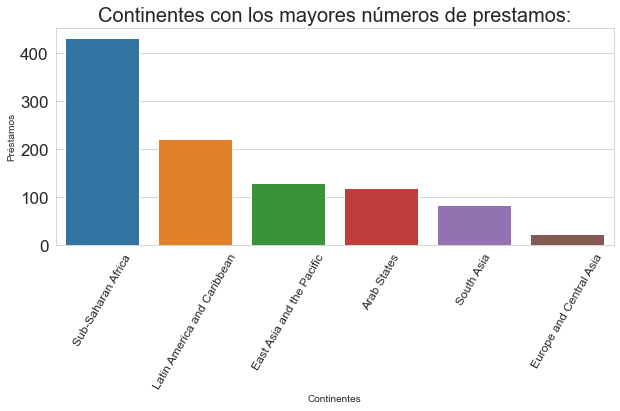

In [202]:
kiva_loan_regions = pd.DataFrame(kiva_mpi_region_locations['world_region'].value_counts()) 
kiva_loan_regions.reset_index(inplace=True)
kiva_loan_regions.columns = ['world_region', 'total_amount'] 
# Se cambia el nombre a las variables de kiva_loan_regions

plt.figure(figsize=(10, 4))

barplot = sns.barplot(y=kiva_loan_regions['total_amount'], x=kiva_loan_regions['world_region'])

barplot.set(xlabel='Continentes', ylabel='Préstamos') 

plt.title('Continentes con los mayores números de prestamos:', fontsize=20)
plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=17)
plt.show()

In [ ]:
# Los datos y el gráfico previo dan una idea general de los préstamos recibidos por continente ya que solo registra 2772 préstamos,
# que son los que cuentan con datos de mpi (pobreza multidimensional). Dataset: kiva_mpi_region_locations

### 4.2 Paises con los mayores montos de prestamos

In [53]:
kiva_loans.groupby('country')['loan_amount'].sum().sort_values(ascending = False)

country
Philippines       55342225
Kenya             34534300
United States     31496375
Peru              30867400
Paraguay          29629075
                    ...   
Mauritania           15000
Afghanistan          14000
Virgin Islands       10000
Vanuatu               9250
Guam                  4300
Name: loan_amount, Length: 87, dtype: int64

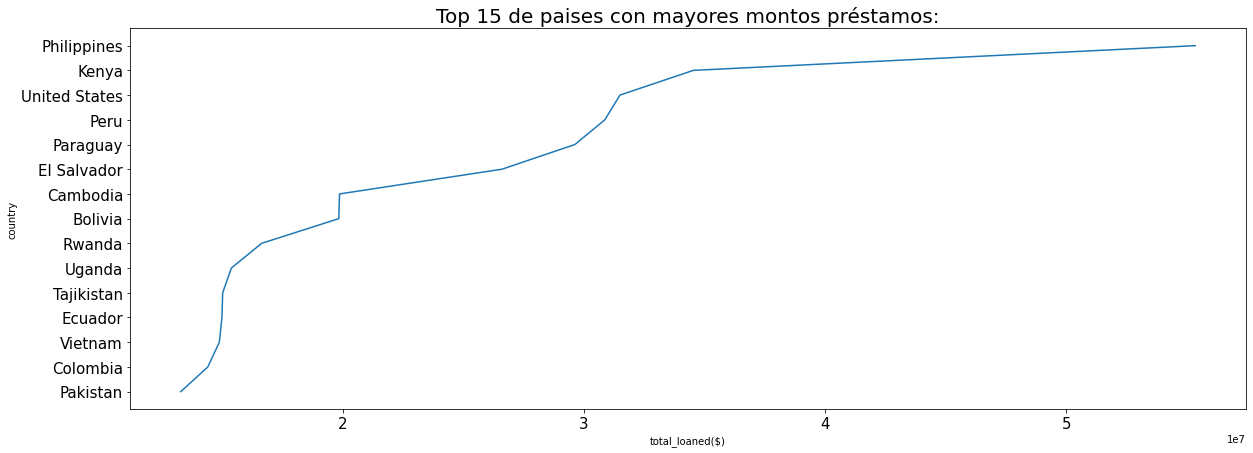

In [54]:
kiva_loans_countries = pd.DataFrame(kiva_loans.groupby('country')['loan_amount'].sum().sort_values(ascending = False))
kiva_loans_countries.reset_index(inplace=True)
kiva_loans_countries.columns = ['country', 'total_loaned']

plt.figure(figsize=(20, 7))

barplot = sns.lineplot(x=kiva_loans_countries['total_loaned'][:15], y=kiva_loans_countries['country'][:15])
barplot.set(xlabel='total_loaned($)', ylabel='country')
plt.title('Top 15 de paises con mayores montos préstamos:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# Tenemos a Perú en el cuarto lugar con 30 millones 867 mil 400 dólares en préstamos recibidos. Filipinas comanda la tabla con 55'342,225.
# En el top 15 tenemos a seis paises latinoamericanos liderados, en montos recibidos, por el Perú.

### 4.3 Sectores en los que se encuentran los mayores montos invertidos

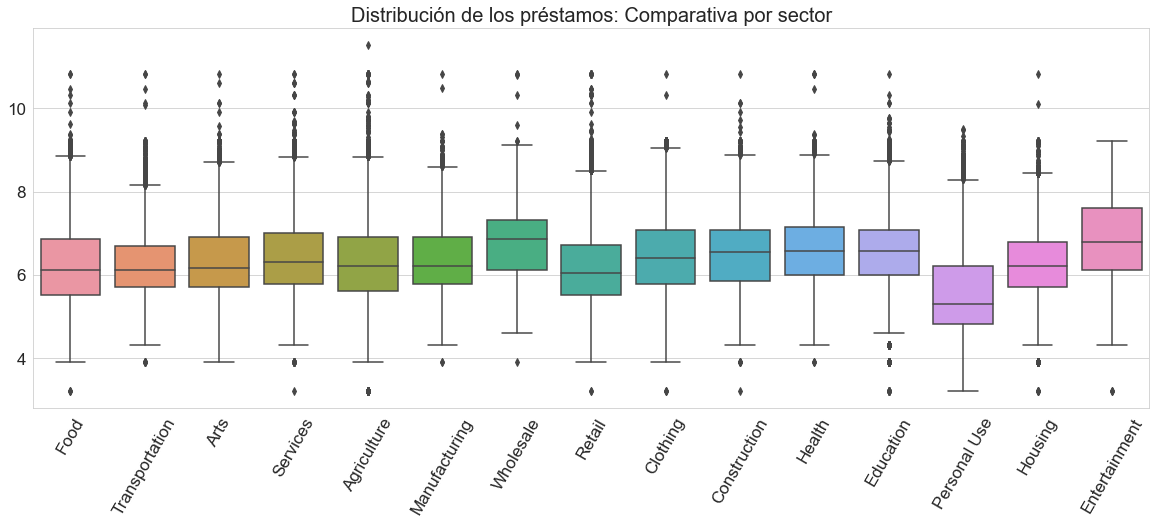

In [55]:
# Se crea una variable usando logaritmos de loan_mount(montos prestados)
kiva_loans['loan_amount_log'] = np.log(kiva_loans['loan_amount']) 
plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=kiva_loans)
boxplot.set(xlabel='', ylabel='')
plt.title('Distribución de los préstamos: Comparativa por sector', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [ ]:
# El sector agricultura es el que mayores préstamos recibe, sin embargo la mediana de los préstamos no es la mas alta.

### 4.4 Prestatarios por género

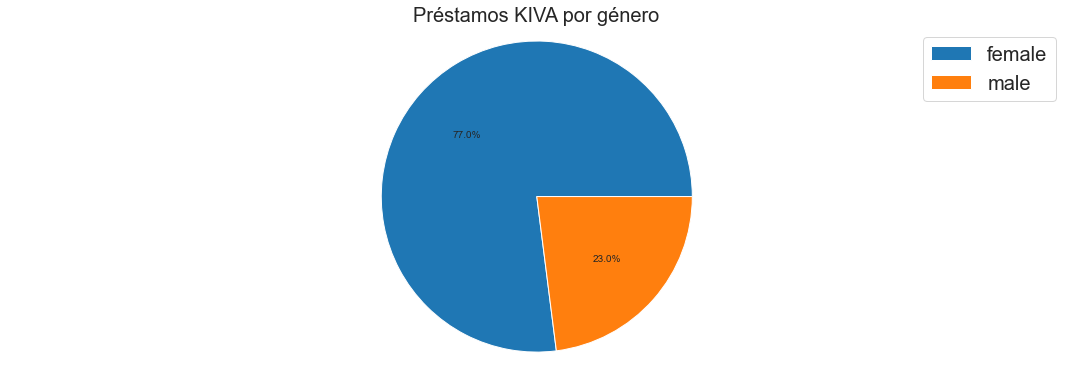

In [56]:
kiva_loans['borrower_genders'] = kiva_loans['borrower_genders'].astype(str)
gender_list = pd.DataFrame(kiva_loans['borrower_genders'].str.split(',').tolist())
kiva_loans['clean_borrower_genders'] = gender_list[0]
kiva_loans.loc[kiva_loans['clean_borrower_genders'] == 'nan', 'clean_borrower_genders'] = np.nan

kiva_gender = kiva_loans['clean_borrower_genders'].value_counts()
labels = kiva_gender.index

plt.figure(figsize=(15, 5))

patches = plt.pie(kiva_gender, autopct='%1.1f%%')
plt.legend(labels, fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.title("Préstamos KIVA por género", fontsize=20)
plt.show()

In [ ]:
# A nivel global el 77% de quienes recibieron los préstamos fueron mujeres.

### 4.5 Monto prestado vs Monto financiado

In [57]:
lfac = pd.DataFrame(kiva_loans.groupby('country')[['loan_amount', 'funded_amount']].sum().sort_values(by=['loan_amount', 'funded_amount'], ascending=False).reset_index())
lfac

,country,loan_amount,funded_amount
0,Philippines,55342225,54476375
1,Kenya,34534300,32248405
2,United States,31496375,23158540
3,Peru,30867400,30394850
4,Paraguay,29629075,29412700
...,...,...,...
82,Mauritania,15000,15000
83,Afghanistan,14000,14000
84,Virgin Islands,10000,0
85,Vanuatu,9250,9250


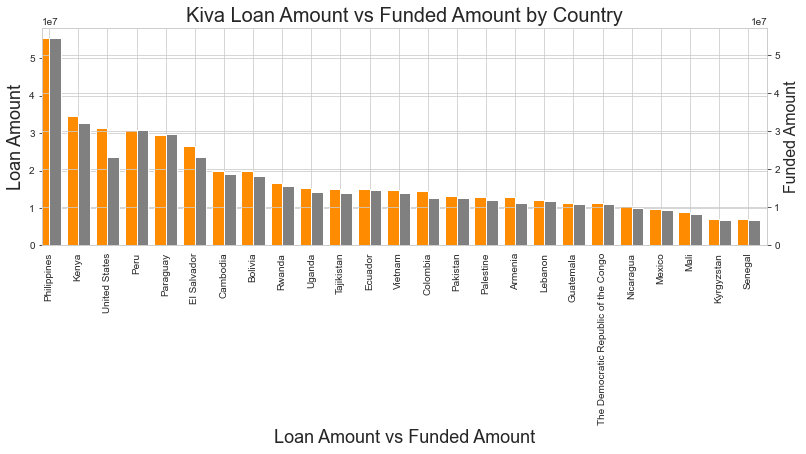

In [58]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
ax_cpy = ax.twinx() 
width = 0.4

lfac.set_index('country').loan_amount[:25].plot(kind='bar', color='DarkOrange', ax=ax, width=width, position=1)
lfac.set_index('country').funded_amount[:25].plot(kind='bar', color='Gray', ax=ax_cpy, width=width, position=0)

plt.title("Kiva Loan Amount vs Funded Amount by Country", fontsize=20)
ax.set_xlabel('Loan Amount vs Funded Amount', fontsize=18)
ax.set_ylabel('Loan Amount', fontsize=18)
ax_cpy.set_ylabel('Funded Amount', fontsize=16)
plt.xticks(fontsize=14, rotation=75)
plt.show()

In [ ]:
# Existe una ligera diferencia entre los montos prestados (y solicitados) con los montos financiados, siendo el caso mas notorio el de los Estados Unidos. En el caso de Peru no hay diferencia.  

## 5. Una mirada al Perú

In [ ]:
# Basado e inspirado en los trabajos de cesarjaitmanlabaton, kalangukabridget, samratp y thebrownviking 20 (ver referencias completas en 1)

### 5.1 Estableciendo el dataset

In [59]:
peru = pd.DataFrame(kiva_loans[kiva_loans['country'] == 'Peru'])
peru_partners = pd.DataFrame(loan_themes_by_region[loan_themes_by_region['country'] == 'Peru'])
peru.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,lender_count,tags,borrower_genders,repayment_interval,date,year,month,day,loan_amount_log,clean_borrower_genders
53,653432,550,550,Personal Expenses,Personal Use,to buy a cradle and household items for his yo...,PE,Peru,Ica,PEN,...,20,"#Parent, user_favorite",male,monthly,2014-01-02,2014,1,2,6.309918,male
69,653410,1075,1075,Transportation,Transportation,to pay for general maintenance on his vehicle.,PE,Peru,Ica,PEN,...,41,"#Parent, user_favorite",male,monthly,2014-01-02,2014,1,2,6.980076,male
102,653399,3975,3975,Food Stall,Food,to buy supplies.,PE,Peru,NaN,PEN,...,84,NaN,"female, female, female, female, female, female...",irregular,2014-01-02,2014,1,2,8.287780,female


In [60]:
# Verificando
peru_partners.head(3)

,partner id,field partner name,sector,loan theme id,loan theme type,country,forkiva,region,geocode_old,iso,...,amount,locationname,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
2012,93,EDAPROSPO,General Financial Inclusion,a1050000000wezx,General,Peru,No,HUANCAYO,"(-12.0666667, -75.2333333)",PER,...,1500,"HUANCAYO, Peru","[(-12.0686357, -75.21029759999999)]",Huancayo; Huancayo; Junin; Peru,"(-12.0686357, -75.21029759999999)",-12.068636,-75.210298,"Huancavelica, Peru","(-12.7861978, -74.9764024)",30.0
2013,93,EDAPROSPO,General Financial Inclusion,a1050000000PPfo,Higher Education,Peru,Yes,HUANCAYO,"(-12.0666667, -75.2333333)",PER,...,4950,"HUANCAYO, Peru","[(-12.0686357, -75.21029759999999)]",Huancayo; Huancayo; Junin; Peru,"(-12.0686357, -75.21029759999999)",-12.068636,-75.210298,"Huancavelica, Peru","(-12.7861978, -74.9764024)",30.0
2014,93,EDAPROSPO,General Financial Inclusion,a1050000000PPfo,Higher Education,Peru,Yes,Huancayo,NaN,PER,...,107725,"Huancayo, Peru","[(-12.0686357, -75.21029759999999)]",Huancayo; Huancayo; Junin; Peru,"(-12.0686357, -75.21029759999999)",-12.068636,-75.210298,"Huancavelica, Peru","(-12.7861978, -74.9764024)",30.0


In [61]:
# Información del dataset
peru.info()
## Numero de préstamos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22233 entries, 53 to 671099
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      22233 non-null  int64         
 1   funded_amount           22233 non-null  int64         
 2   loan_amount             22233 non-null  int64         
 3   activity                22233 non-null  object        
 4   sector                  22233 non-null  object        
 5   use                     22179 non-null  object        
 6   country_code            22233 non-null  object        
 7   country                 22233 non-null  object        
 8   region                  22073 non-null  object        
 9   currency                22233 non-null  object        
 10  partner_id              22233 non-null  float64       
 11  posted_time             22233 non-null  object        
 12  disbursed_time          22233 non-null  obje

In [62]:
peru_partners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 2012 to 15662
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   partner id          609 non-null    int64  
 1   field partner name  609 non-null    object 
 2   sector              609 non-null    object 
 3   loan theme id       609 non-null    object 
 4   loan theme type     609 non-null    object 
 5   country             609 non-null    object 
 6   forkiva             609 non-null    object 
 7   region              609 non-null    object 
 8   geocode_old         23 non-null     object 
 9   iso                 609 non-null    object 
 10  number              609 non-null    int64  
 11  amount              609 non-null    int64  
 12  locationname        609 non-null    object 
 13  geocode             382 non-null    object 
 14  names               382 non-null    object 
 15  geo                 609 non-null    object 
 16  lat

### 5.2 Préstamos recibidos 

In [63]:
pd.DataFrame(peru['loan_amount']).value_counts().sum() # Número

22233

In [64]:
pd.DataFrame(peru['loan_amount']).sum() # Monto

loan_amount    30867400
dtype: int64

In [ ]:
# Total de montos recibidos 30'867,400 dólares, con un promedio global de 1,388.4 dólares por préstamo.]

#### 5.2.1  Prestamos por año

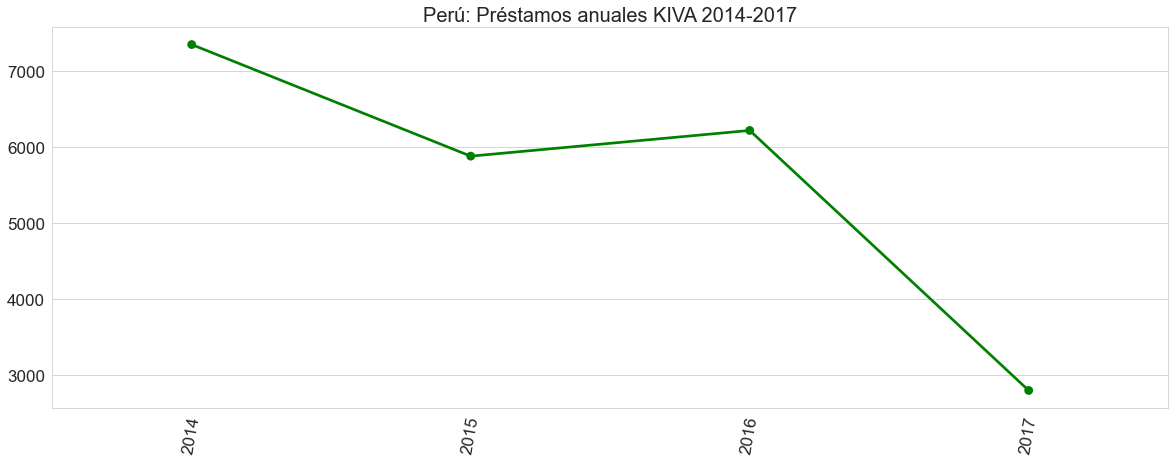

In [65]:
peru_amount_loan = peru.groupby('year').count().sort_values(by='loan_amount', ascending=False)
peru_amount_loan.reset_index(inplace=True)

plt.figure(figsize=(20, 7))

barplot = sns.pointplot(x=peru_amount_loan['year'], y=peru_amount_loan['loan_amount'], color='g')
barplot.set(xlabel='', ylabel='')
plt.title('Displaying the yearly loan amounts:', fontsize=20)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)
plt.title("Perú: Préstamos anuales KIVA 2014-2017", fontsize=20)
plt.show()

In [ ]:
# Hubo una reducción de montos recibidos el 2015, re recuperó en algo el 2016. La caida del 2017 se debe a que el periodo de analisis termina en julio.

#### 5.2.2  Número de prestamos por mes y año

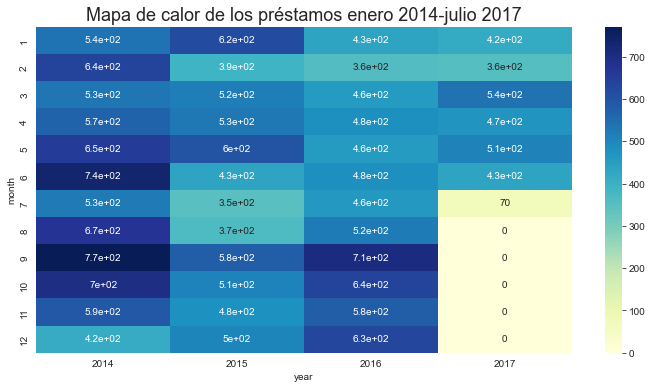

In [66]:
time_agg = peru.groupby(['year','month'],as_index=False).size().reset_index(drop=True)
time_agg.columns = ['year','month','loan_count']
time_agg = time_agg.pivot(index='month',columns='year',values='loan_count')
time_agg = time_agg.fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(time_agg,cmap="YlGnBu",annot = True )
plt.title("Mapa de calor de los préstamos enero 2014-julio 2017", fontsize=18);

In [ ]:
# El número de préstamos mensuales fue importamte el 2014, bajo el 2015 y se recuperó el segundo semestre de 2016.

#### 5.2.3  Distribución de los préstamos según montos

Text(0.5, 1.0, 'Distribución de los préstamos por cuartil')

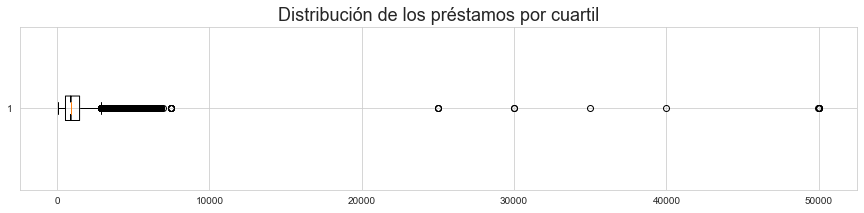

In [67]:
plt.figure(figsize=(15,3))
_ = plt.boxplot(peru['loan_amount'], vert=False, notch=True)
plt.title("Distribución de los préstamos por cuartil", fontsize=18)

In [68]:
print(np.min(peru['loan_amount']))
print(np.max(peru['loan_amount']))

50
50000


In [ ]:
# El gráfico de la distribución de préstamos muestra una asimetrica positiva (sesgo positivo hacia la derecha), La mediana está mas cerca del primer cuartil. 
# Se observa también que el préstamo mínimo fue de 25 dólares y el máximo de 50,000 dólares.
# La concentración de préstamos está en los montos menores, y los préstamos altos son valores atípicos y muy pocos.Sin embargo, no deja de llamar la atención que se dieran.

In [69]:
fp=peru[peru['funded_amount']== 50000]
fp

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,lender_count,tags,borrower_genders,repayment_interval,date,year,month,day,loan_amount_log,clean_borrower_genders
34196,687045,50000,50000,Renewable Energy Products,Retail,to buy and sell Barefoot Power's Solar Lightin...,PE,Peru,Arequipa,USD,...,1446,"user_favorite, user_favorite, #Eco-friendly, #...",male,irregular,2014-03-21,2014,3,21,10.819778,male
408465,1055190,50000,50000,Construction,Construction,NaN,PE,Peru,NaN,USD,...,1310,"#Eco-friendly, #Job Creator, #Biz Durable Asse...",nan,irregular,2016-04-15,2016,4,15,10.819778,NaN


#### 5.2.4  Otra mirada a la distribucion de los préstamos 

Text(0.5, 1.0, 'Histograma de los préstamos ($)')

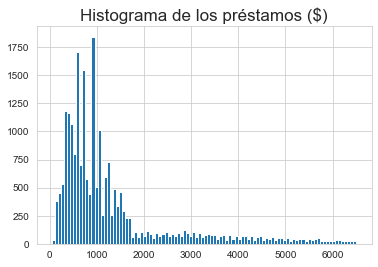

In [70]:
_ = plt.hist(peru['loan_amount'], range=(50, 6500), bins = 100)
plt.title("Histograma de los préstamos ($)", fontsize=17)

In [ ]:
# El histograma muestra que efectivamente la mayoría de préstamos están alrededor de los mil dólares.

#### 5.2.5  Distribución de los préstamos según montos menores 

Text(0.5, 1.0, 'Distribución de los préstamos menores a 2001 dólares')

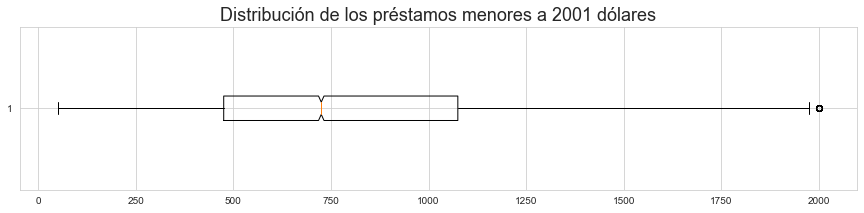

In [71]:
plt.figure(figsize=(15,3))
_ = plt.boxplot(peru[peru.loan_amount < 2001].loan_amount, vert=False, notch=True)
plt.title("Distribución de los préstamos menores a 2001 dólares", fontsize=18)

In [ ]:
# Si hacemos el mismo ejercicio pero considerando solo los préstamos menores a 2001 dólares vemos que recien ahí aparecen los outliers o valores atípicos.

### 5.3 Préstamos por Regiones

#### 5.3.1 Regiones del pais con mayores montos de prestamos

In [199]:
peru_region = pd.DataFrame(peru.groupby('region')['loan_amount'].sum().sort_values(ascending = False))
peru_region.reset_index(inplace=True)
peru_region

,region,loan_amount
0,Cusco,6222075
1,CUSCO,2505200
2,Huarochiri,1731250
3,Huaycan,1498750
4,Lima Norte,1402050
...,...,...
572,Lizacia,300
573,Punta Negra,200
574,Chachapoyas -Chachapoyas-Chachapoyas,200
575,Cieneguilla,200


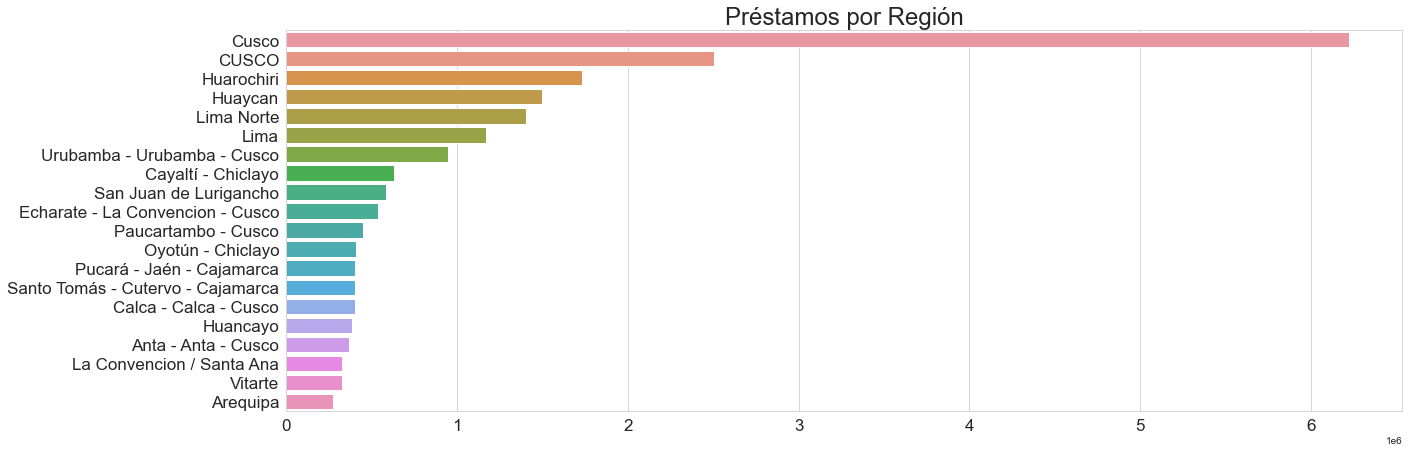

<Figure size 1440x504 with 0 Axes>

In [72]:
peru_region = pd.DataFrame(peru.groupby('region')['loan_amount'].sum().sort_values(ascending = False))
peru_region.reset_index(inplace=True)

peru_region.columns = ['region', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=peru_region['total_amount'][:20], y=peru_region['region'][:20])
barplot.set(xlabel='', ylabel='')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title("Préstamos por Región", fontsize=24)
plt.figure(figsize=(20, 7))
plt.show();

In [ ]:
# Cusco es largamente la región que mayores préstamos ha recibido, seguido de lejos por Lima.

#### 5.3.2 Préstamos en las regiones y ruralidad

In [73]:
peru_rural = pd.DataFrame(loan_themes_by_region[loan_themes_by_region['country']== 'Peru'])
peru_rural.head(3)

,partner id,field partner name,sector,loan theme id,loan theme type,country,forkiva,region,geocode_old,iso,...,amount,locationname,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
2012,93,EDAPROSPO,General Financial Inclusion,a1050000000wezx,General,Peru,No,HUANCAYO,"(-12.0666667, -75.2333333)",PER,...,1500,"HUANCAYO, Peru","[(-12.0686357, -75.21029759999999)]",Huancayo; Huancayo; Junin; Peru,"(-12.0686357, -75.21029759999999)",-12.068636,-75.210298,"Huancavelica, Peru","(-12.7861978, -74.9764024)",30.0
2013,93,EDAPROSPO,General Financial Inclusion,a1050000000PPfo,Higher Education,Peru,Yes,HUANCAYO,"(-12.0666667, -75.2333333)",PER,...,4950,"HUANCAYO, Peru","[(-12.0686357, -75.21029759999999)]",Huancayo; Huancayo; Junin; Peru,"(-12.0686357, -75.21029759999999)",-12.068636,-75.210298,"Huancavelica, Peru","(-12.7861978, -74.9764024)",30.0
2014,93,EDAPROSPO,General Financial Inclusion,a1050000000PPfo,Higher Education,Peru,Yes,Huancayo,NaN,PER,...,107725,"Huancayo, Peru","[(-12.0686357, -75.21029759999999)]",Huancayo; Huancayo; Junin; Peru,"(-12.0686357, -75.21029759999999)",-12.068636,-75.210298,"Huancavelica, Peru","(-12.7861978, -74.9764024)",30.0


In [74]:
peru_rural.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 2012 to 15662
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   partner id          609 non-null    int64  
 1   field partner name  609 non-null    object 
 2   sector              609 non-null    object 
 3   loan theme id       609 non-null    object 
 4   loan theme type     609 non-null    object 
 5   country             609 non-null    object 
 6   forkiva             609 non-null    object 
 7   region              609 non-null    object 
 8   geocode_old         23 non-null     object 
 9   iso                 609 non-null    object 
 10  number              609 non-null    int64  
 11  amount              609 non-null    int64  
 12  locationname        609 non-null    object 
 13  geocode             382 non-null    object 
 14  names               382 non-null    object 
 15  geo                 609 non-null    object 
 16  lat

Coeficiente de correlación entre el monto de préstamos y el % de pob. rural:  -0.2214806319860214


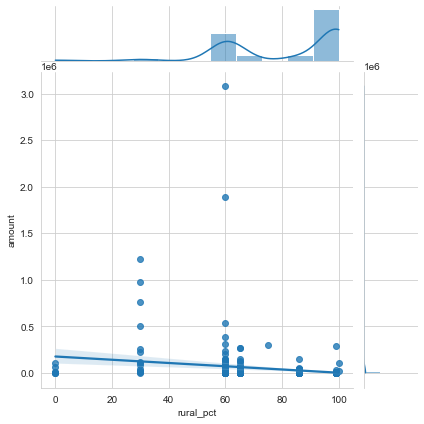

In [75]:
print("Coeficiente de correlación entre el monto de préstamos y el % de pob. rural: ",peru_rural['amount'].corr(peru_rural['rural_pct']))
sns.jointplot(y="amount", x="rural_pct", data=peru_rural, kind='reg');

In [ ]:
# El gráfico anterior muestra que no existe correlación entre los montos de los préstamos y el % de población rural, es decir los préstamos de Kiva no crecen en función de una mayor ruralidad.
# Lo contrario se acercaría un poco más a la realidad, el monto de los préstamos se reduce en zonas con mayor ruralidad, sin embargo al ser el coeficente de correlación tan bajo le quita solidez al argumento. 

### 5.4 Préstamos por Sectores

#### 5.4.1 Montos de préstamos por sector

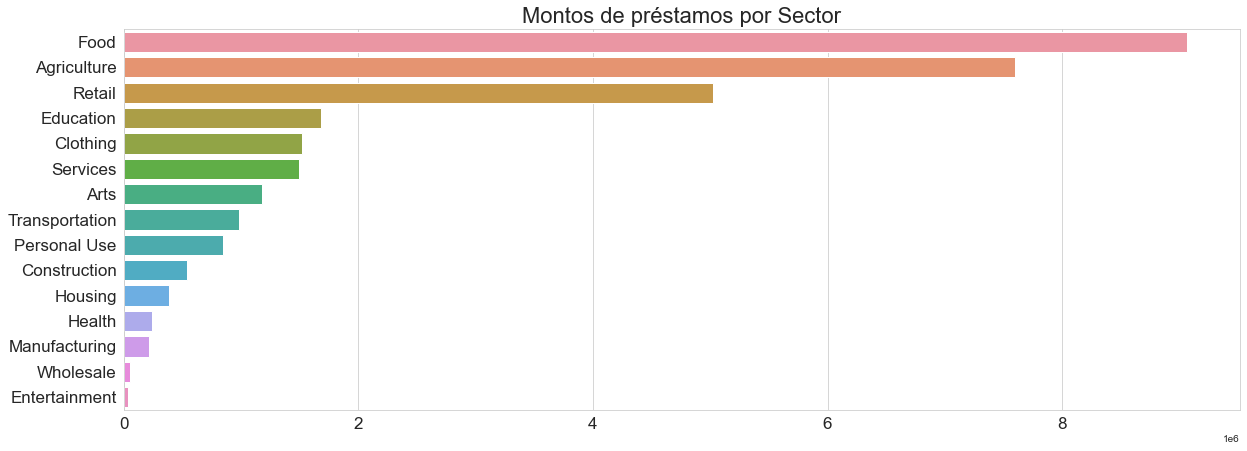

In [76]:
peru_sector = pd.DataFrame(peru.groupby('sector')['loan_amount'].sum().sort_values(ascending = False))
peru_sector.reset_index(inplace=True)

peru_sector.columns = ['sector', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=peru_sector['total_amount'][:20], y=peru_sector['sector'][:20])
barplot.set(xlabel='', ylabel='')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('Montos de préstamos por Sector', fontsize=22)
plt.show()

In [ ]:
# Los sectores que mayores préstamos tuvieron fueron alimentos, agricultura y ventas minoristas.

#### 5.4.2 Promedios de préstamos por sector

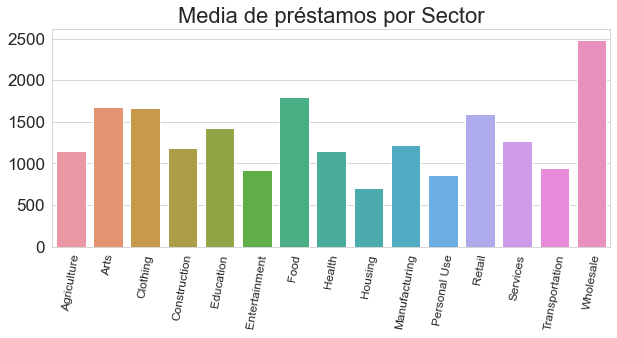

In [79]:
peru_sector_average = pd.DataFrame(peru.groupby(['sector'])['loan_amount'].mean().reset_index())

plt.figure(figsize=(10, 4))

barplot = sns.barplot(x=peru_sector_average['sector'], y=peru_sector_average['loan_amount'])
barplot.set(xlabel='', ylabel='')
plt.title('Media de préstamos por Sector', fontsize=22)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=17)
plt.show()

In [ ]:
# Ventas al mayorista es el sector que tiene en promedio los préstamos de mayor monto, aunque en el total recibido está casi en la cola. 

#### 5.4.3 Préstamos por sector -  Distribución según cuantiles

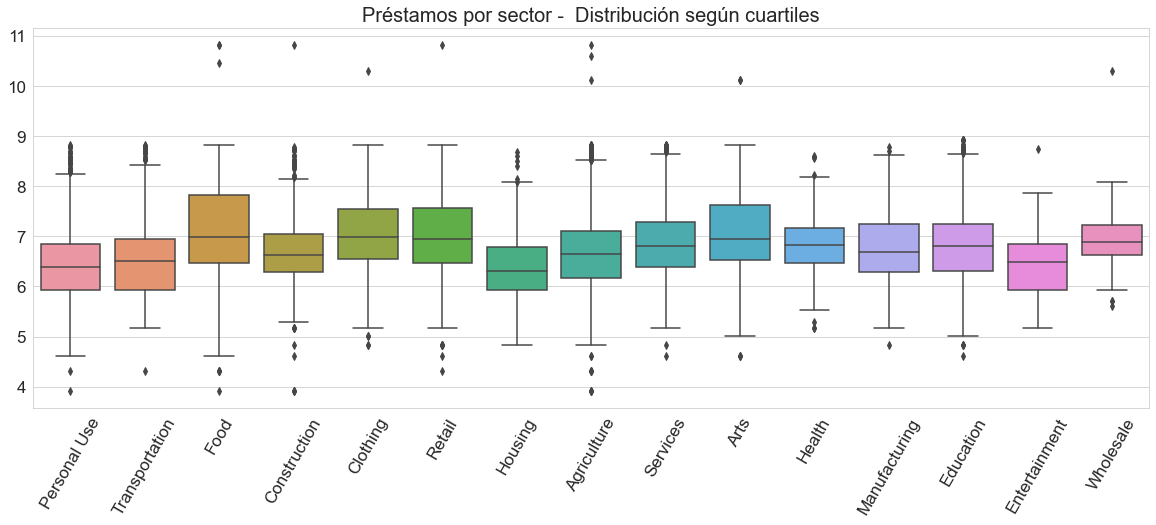

In [80]:
plt.figure(figsize=(20, 7))

sns.set_style('whitegrid')
boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=peru)
boxplot.set(xlabel='', ylabel='')
plt.title("Préstamos por sector -  Distribución según cuartiles", fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [10]:
# El gráfico resume lo dicho previamente, agricultura es el sector que mayores préstamos recibió,seguido de alimentos y retail.
# Alimentos, vestido y artes son los sectores con las medianas de préstamos mas altas. 

#### 5.4.4 Frecuencia de prestamos por monto en los sectores con mayores montos recibidos

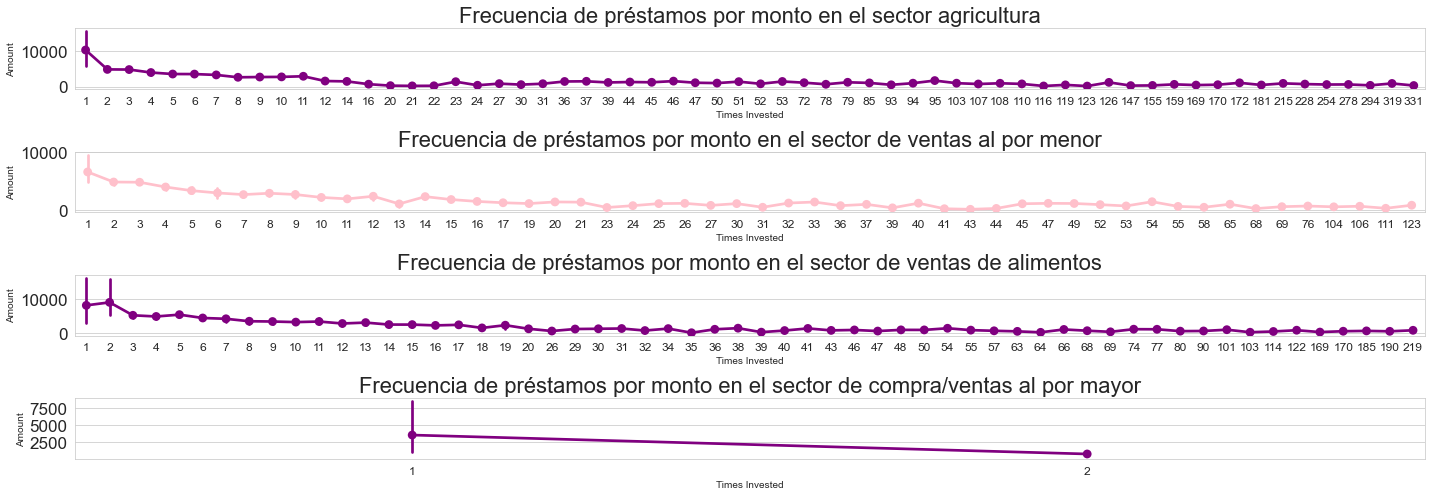

In [81]:
peru_counting_agriculture = pd.DataFrame(peru[peru['sector'] == 'Agriculture']['loan_amount'].value_counts().reset_index())
peru_counting_retail = pd.DataFrame(peru[peru['sector'] == 'Retail']['loan_amount'].value_counts().reset_index())
peru_counting_food = pd.DataFrame(peru[peru['sector'] == 'Food']['loan_amount'].value_counts().reset_index())
peru_counting_wholesale = pd.DataFrame(peru[peru['sector'] == 'Wholesale']['loan_amount'].value_counts().reset_index())
plt.figure(figsize=(20, 7))
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 17

plt.subplot(411)
ax1 = sns.pointplot(x=peru_counting_agriculture['loan_amount'], y=peru_counting_agriculture['index'], color='purple')
ax1.set(xlabel='Times Invested', ylabel='Amount')
ax1.set_title('Frecuencia de préstamos por monto en el sector agricultura', fontsize=22)

plt.subplot(412)
ax2 = sns.pointplot(x=peru_counting_retail['loan_amount'], y=peru_counting_retail['index'], color='pink')
ax2.set(xlabel='Times Invested', ylabel='Amount')
ax2.set_title('Frecuencia de préstamos por monto en el sector de ventas al por menor', fontsize=22)

plt.subplot(413)
ax3 = sns.pointplot(x=peru_counting_food['loan_amount'], y=peru_counting_food['index'], color='purple')
ax3.set(xlabel='Times Invested', ylabel='Amount')
ax3.set_title('Frecuencia de préstamos por monto en el sector de ventas de alimentos', fontsize=22)

plt.subplot(414)
ax4 = sns.pointplot(x=peru_counting_wholesale['loan_amount'], y=peru_counting_wholesale['index'], color='purple')
ax4.set(xlabel='Times Invested', ylabel='Amount')
ax4.set_title('Frecuencia de préstamos por monto en el sector de compra/ventas al por mayor', fontsize=22)

plt.tight_layout()
plt.show()

In [ ]:
# Es claro que los mayores montos de préstamos recibidos por los sectores está relacionado con la frecuencia.
# Agricultura, alimentos y ventas al por menor tienen muchos préstamos de bajo momto.
# El caso de Ventas al por mayor que tiene la media de préstamos mas alta, y se explica por tener muy poca frecuencia de préstamos pero de monto elevado.

#### 5.4.5 Cantidad de préstamos anuales por sector durante el periodo

In [82]:
light_palette = sns.light_palette("green", as_cmap=True)
pd.crosstab(peru['year'], peru['sector']).style.background_gradient(cmap=light_palette)

sector,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale
year,,,,,,,,,,,,,,,
2014,1820,185,291,156,392,16,1588,53,454,62,539,1040,356,386,6
2015,2040,186,250,133,248,9,1306,50,39,45,147,777,334,308,5
2016,1871,225,251,113,408,7,1455,61,20,51,213,932,355,245,8
2017,858,103,121,58,127,6,703,47,38,18,83,398,136,99,2


In [12]:
# A un nivel mas agregado (anual) queda claro cuales fueron los sectores que mayor cantidad de préstamos tuvieron. Así mientras Agricultura tuvo 6589, Ventas al por mayor solo 21.

### 5.5 Préstamos por Actividades

#### 5.5.1 Total de montos de préstamos según actividad

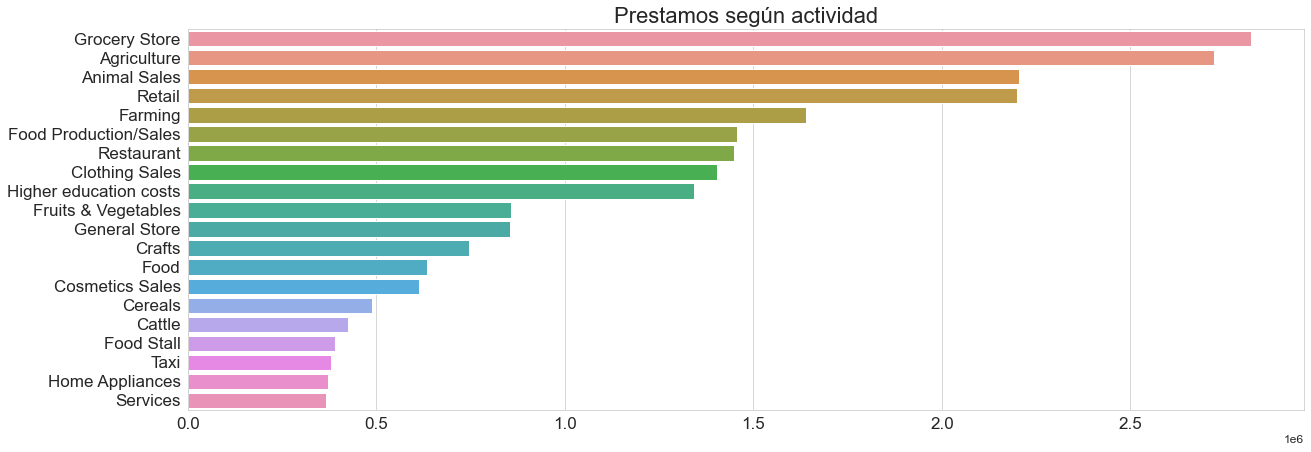

In [83]:
peru_activity = pd.DataFrame(peru.groupby('activity')['loan_amount'].sum().sort_values(ascending = False))
peru_activity.reset_index(inplace=True)

peru_activity.columns = ['activity', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=peru_activity['total_amount'][:20], y=peru_activity['activity'][:20])
barplot.set(xlabel='', ylabel='')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('Prestamos según actividad', fontsize=22)
plt.show()

In [ ]:
# Las actividades al interior de los sectores dan mayor detalle de los rubros de los préstamos.
# Abarrotes, agricultura y ventas minoristas (junto a ventas de animales) son las actividades que recibieron los mayores montos de préstamos.

#### 5.5.2 Uso de préstamos por actividad

##### 5.5.2.1 Uso de préstamos según Grocery Store

In [14]:
# Y si se quiere ser todavía más exhaustivos, podemos observar en los gráficos siguientes el uso que se tuvo de los préstamos en cada actividad.

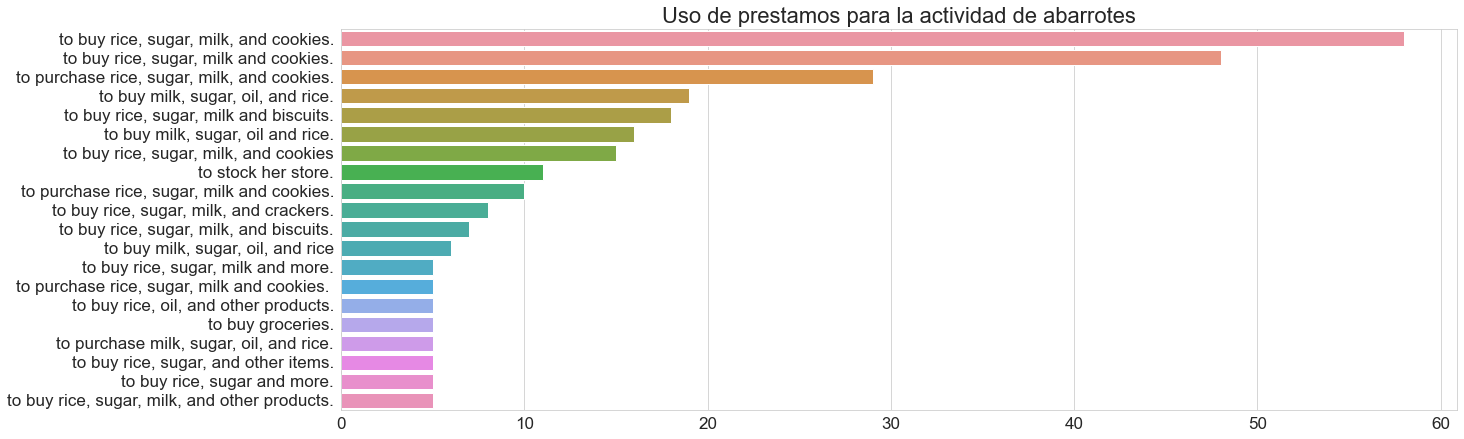

In [84]:
peru_grocerystore = pd.DataFrame(peru[peru['activity'] == 'Grocery Store'])
peru_grocerystore = pd.DataFrame(peru_grocerystore['use'].value_counts())
peru_grocerystore.reset_index(inplace=True)
peru_grocerystore.columns = ['use', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=peru_grocerystore['total_amount'][:20], y=peru_grocerystore['use'][:20])
barplot.set(xlabel='', ylabel='')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('Uso de prestamos para la actividad de abarrotes', fontsize=22)
plt.show()

In [ ]:
# Arroz, azucar, leche y galletas dominan el uso de los préstamos en la actividad de abarrotes.

##### 5.5.2.2 Uso de préstamos según Agriculture

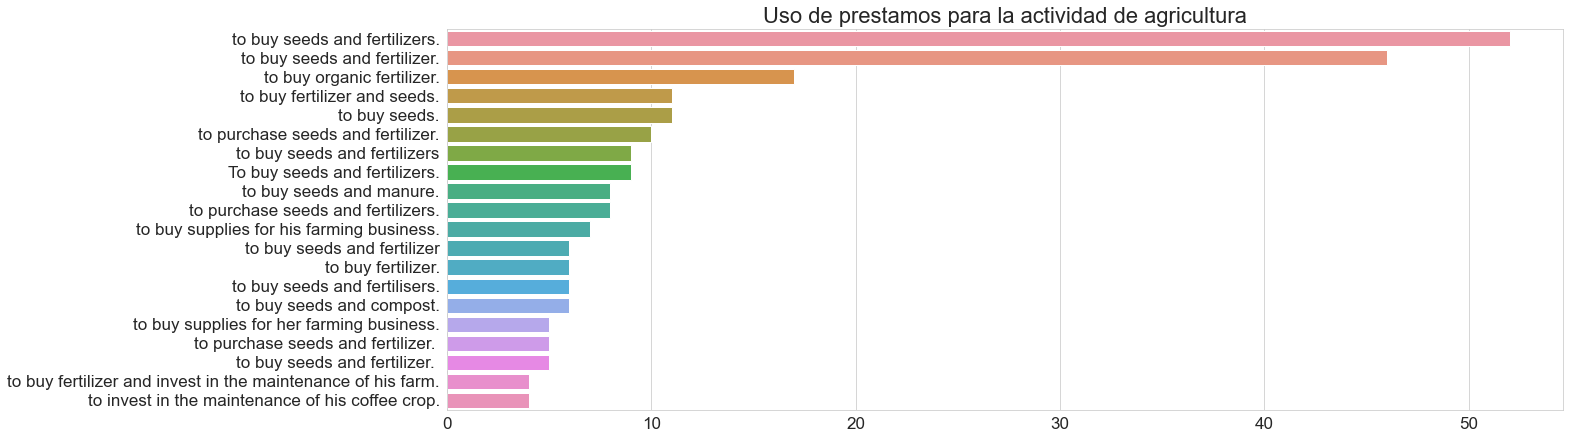

In [85]:
peru_agriculture = pd.DataFrame(peru[peru['activity'] == 'Agriculture'])
peru_agriculture = pd.DataFrame(peru_agriculture['use'].value_counts())
peru_agriculture.reset_index(inplace=True)
peru_agriculture.columns = ['use', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=peru_agriculture['total_amount'][:20], y=peru_agriculture['use'][:20])
barplot.set(xlabel='', ylabel='')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('Uso de prestamos para la actividad de agricultura', fontsize=22)
plt.show()

In [ ]:
# Semillas y fertilizantes son los principales usos de los préstamos en la actividad agricultura.

##### 5.5.2.3 Uso de préstamos según Retail

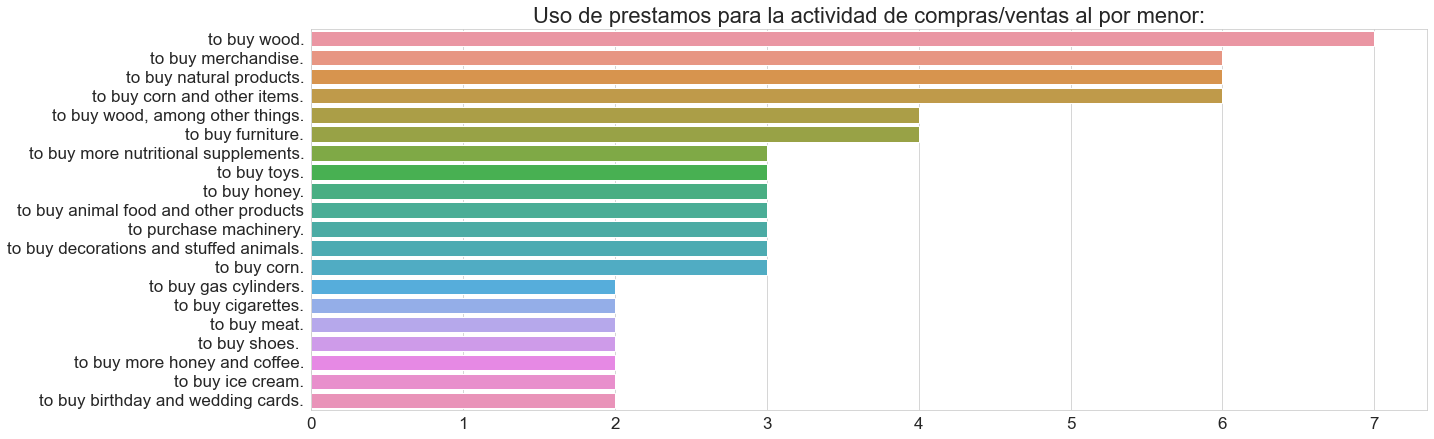

In [86]:
peru_retail = pd.DataFrame(peru[peru['activity'] == 'Retail'])
peru_retail = pd.DataFrame(peru_retail['use'].value_counts())
peru_retail.reset_index(inplace=True)
peru_retail.columns = ['use', 'total_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=peru_retail['total_amount'][:20], y=peru_retail['use'][:20])
barplot.set(xlabel='', ylabel='')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('Uso de prestamos para la actividad de compras/ventas al por menor:', fontsize=22)
plt.show()

In [ ]:
# En ventas minoristas es un poco mas diversificado el uso de los préstamos. Madera, mercancias y productos naturales lideran.

#### 5.5.3 Total de préstamos según actividad por año

In [87]:
light_palette = sns.light_palette("green", as_cmap=True)
pd.crosstab(peru['year'], peru['activity']).style.background_gradient(cmap=light_palette)

activity,Agriculture,Animal Sales,Aquaculture,Arts,Auto Repair,Bakery,Barber Shop,Beauty Salon,Beverages,Blacksmith,Bookstore,Bricks,Butcher Shop,Cafe,Call Center,Carpentry,Catering,Cattle,Cement,Cereals,Charcoal Sales,Cheese Making,Child Care,Cleaning Services,Cloth & Dressmaking Supplies,Clothing,Clothing Sales,Cobbler,Computer,Computers,Construction,Construction Supplies,Consumer Goods,Cosmetics Sales,Crafts,Dairy,Decorations Sales,Dental,Education provider,Electrical Goods,Electrician,Electronics Repair,Electronics Sales,Embroidery,Entertainment,Event Planning,Farm Supplies,Farming,Fish Selling,Fishing,Florist,Flowers,Food,Food Market,Food Production/Sales,Food Stall,Fruits & Vegetables,Fuel/Firewood,Funerals,Furniture Making,Games,General Store,Goods Distribution,Grocery Store,Hardware,Health,Higher education costs,Home Appliances,Home Energy,Home Products Sales,Hotel,Internet Cafe,Jewelry,Knitting,Land Rental,Laundry,Liquor Store / Off-License,Livestock,Machine Shop,Machinery Rental,Manufacturing,Medical Clinic,Metal Shop,Milk Sales,Mobile Phones,Motorcycle Repair,Motorcycle Transport,Movie Tapes & DVDs,Music Discs & Tapes,Musical Instruments,Musical Performance,Natural Medicines,Office Supplies,Paper Sales,Party Supplies,Perfumes,Personal Expenses,Personal Housing Expenses,Personal Medical Expenses,Personal Products Sales,Pharmacy,Phone Accessories,Phone Repair,Phone Use Sales,Photography,Pigs,Plastics Sales,Poultry,Primary/secondary school costs,Printing,Property,Pub,Quarrying,Recycled Materials,Recycling,Religious Articles,Renewable Energy Products,Restaurant,Retail,Rickshaw,Secretarial Services,Services,Sewing,Shoe Sales,Souvenir Sales,Spare Parts,Sporting Good Sales,Tailoring,Taxi,Textiles,Timber Sales,Tourism,Transportation,Upholstery,Used Clothing,Utilities,Vehicle,Vehicle Repairs,Veterinary Sales,Water Distribution,Weaving,Wholesale
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,665,737,0,6,20,64,0,31,33,1,21,19,15,13,3,16,52,77,1,43,1,4,3,0,12,25,258,5,0,9,58,54,55,125,124,26,8,11,23,3,4,5,6,5,9,0,65,176,17,7,0,3,99,26,281,125,188,14,0,35,5,171,0,396,21,1,329,219,3,18,12,10,17,16,1,3,36,31,0,1,12,5,14,9,7,5,69,2,5,3,2,18,11,1,1,9,232,438,8,18,10,4,2,5,5,16,4,19,40,18,16,20,1,1,3,0,1,160,467,83,2,111,58,39,3,45,0,7,93,15,7,28,141,3,8,1,30,6,4,1,16,6
2015,698,700,0,8,16,39,0,21,22,0,19,10,12,13,0,28,31,121,1,87,0,2,1,0,8,18,229,2,0,3,55,36,55,82,129,22,5,12,19,4,1,5,5,5,0,0,43,321,13,1,0,4,96,14,219,52,139,4,0,23,3,182,0,351,30,1,224,69,0,9,20,18,15,17,1,7,22,63,0,2,10,4,12,10,5,4,70,2,0,2,6,18,7,1,4,9,22,36,0,11,15,3,1,0,0,33,3,30,5,21,3,5,1,1,3,0,1,178,294,10,1,117,38,17,3,53,0,11,69,10,2,34,159,0,3,0,1,8,4,0,15,5
2016,606,424,0,13,18,77,0,30,28,1,15,14,17,13,0,16,37,92,3,54,0,4,1,0,11,8,240,9,0,14,33,44,88,111,148,12,2,15,88,4,2,4,7,6,1,0,38,601,7,3,0,6,114,21,241,79,140,9,0,21,0,222,1,354,39,8,296,79,0,17,22,17,14,21,6,1,19,32,1,9,18,5,10,6,3,2,59,0,2,1,6,16,5,0,3,11,42,11,1,12,16,1,1,3,5,18,9,35,24,15,9,9,0,0,0,2,1,232,375,6,3,87,47,21,3,29,1,23,90,13,3,34,90,1,3,7,4,3,1,0,23,7
2017,284,193,3,2,4,34,2,13,16,0,14,2,9,12,0,9,3,73,0,23,0,0,0,2,3,1,119,2,2,4,24,20,30,45,65,17,0,10,35,1,0,0,4,3,0,1,12,233,3,0,4,0,62,6,129,34,57,4,1,8,1,69,0,198,15,1,75,41,0,10,7,7,4,9,0,1,7,21,0,2,7,3,3,7,3,0,22,1,1,3,5,12,2,0,0,4,11,32,4,5,17,0,0,0,0,12,3,8,15,10,6,5,0,0,1,1,0,98,163,1,0,41,12,14,5,23,0,6,34,5,3,19,42,2,1,0,0,0,2,0,16,2


In [17]:
# Agricultura y venta de animales son las actividades con mayor número de préstamos recibidos. También destacan aunque en menor grado vestidos, cosméticos, educación superior y restaurantes.

### 5.6 Financiamiento y pago de préstamos

#### 5.6.1 Relacion entre montos financiados y número de prestamistas

Coeficiente de correlación entre el monto financiado y el numero de prestamistas:  0.6815999765505886


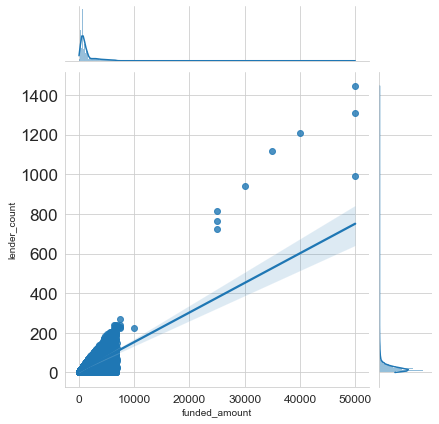

In [88]:
print("Coeficiente de correlación entre el monto financiado y el numero de prestamistas: ",peru['funded_amount'].corr(peru['lender_count']))
sns.jointplot(x="funded_amount", y="lender_count", data=peru, kind='reg')

In [ ]:
# El gráfico muestra que existe una relación positiva entre los mosntos finnciados y el número de prestamistas involucrados.
# La correlación de 0.68 se explica por el hecho de haber dos grupos claramente duferenciados, el de préstamos pequeños bien
# concentrado, y el de los préstamos altos.

#### 5.6.2 Revisando la dispersión

In [19]:
# Para un mayor análisis de la relación entre prestamos y prestamistas recurramnos a los préstamos por sector.

In [111]:
psector = peru.groupby('sector')['funded_amount', 'lender_count'].sum()\
         .sort_values(by = 'funded_amount', ascending = False).reset_index()
psector

,sector,funded_amount,lender_count
0,Food,8942525,130155
1,Agriculture,7491100,180386
2,Retail,4996750,63469
3,Education,1596075,45353
4,Clothing,1488425,19523
5,Services,1477925,22608
6,Arts,1175050,22552
7,Transportation,968150,19027
8,Personal Use,821150,13882
9,Construction,538525,10429


In [112]:
sector = psector['sector']
funded = psector['funded_amount']
lender = psector['lender_count']

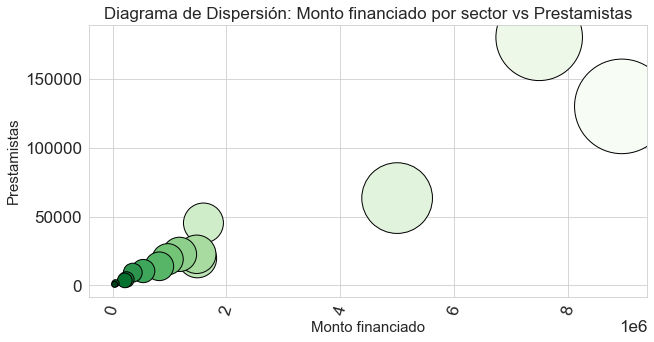

In [116]:
plt.figure(figsize = (10,5))

plt.title('Diagrama de Dispersión: Monto financiado por sector vs Prestamistas', fontsize = 17)
plt.xlabel('Monto financiado', fontsize = 15)
plt.ylabel('Prestamistas', fontsize = 15)

colour = np.arange(len(sector)) # establece el numero de colores (en este caso es un rango de la longitud de sector)

plt.xticks(rotation = 75)

plt.scatter(funded, lender, c = colour, cmap = 'Greens', marker = 'o', s = funded/1000, edgecolor = 'k', alpha = 1.0)

plt.show();
# cmap = Mapas de color de Mathplotlib (Ver:https://matplotlib.org/stable/gallery/color/colormap_reference.html)
# c, numero de colores
# s, tamaño de los marcadores

In [ ]:
# Como en al gráfico de correlación, aquí se observa también que montos de préstamos mayores requieren de mayor número de 
# prestamistas, y se debe a la propia lógica del sistema, quienes prestan lo hacen cn montos pequeños, no se trata de grandes
# inversionistas, considerando que no hay ganancia de por medio.

#### 5.6.3 Monto prestado vs Monto financiado

In [92]:
plfac = pd.DataFrame(peru.groupby('region')[['loan_amount', 'funded_amount']].sum().sort_values(by=['loan_amount', 'funded_amount'], ascending=False).reset_index())
plfac

,region,loan_amount,funded_amount
0,Cusco,6222075,6222075
1,CUSCO,2505200,2488550
2,Huarochiri,1731250,1731250
3,Huaycan,1498750,1498750
4,Lima Norte,1402050,1394825
...,...,...,...
572,Yauca,300,300
573,Chachapoyas -Chachapoyas-Chachapoyas,200,200
574,Cieneguilla,200,200
575,Punta Negra,200,200


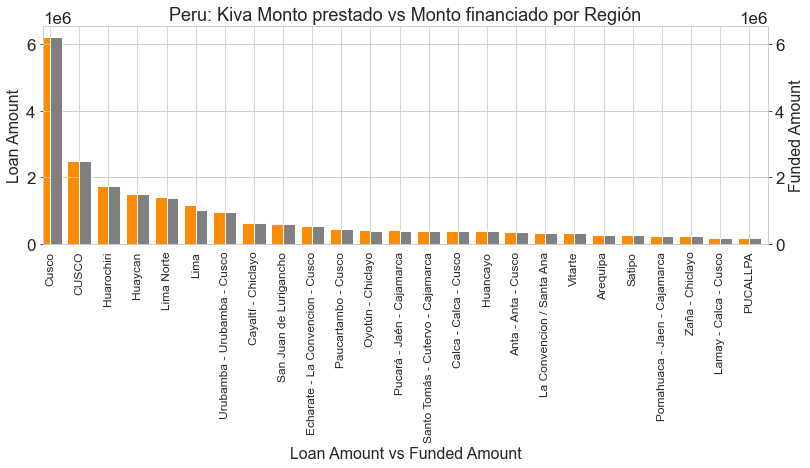

In [93]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
ax_cpy = ax.twinx() # crea y retorna un segundo eje en el lado derecho
width = 0.4

plfac.set_index('region').loan_amount[:25].plot(kind='bar', color='DarkOrange', ax=ax, width=width, position=1)
plfac.set_index('region').funded_amount[:25].plot(kind='bar', color='Gray', ax=ax_cpy, width=width, position=0)

plt.title("Peru: Kiva Monto prestado vs Monto financiado por Región", fontsize=18)
ax.set_xlabel('Loan Amount vs Funded Amount', fontsize=16)
ax.set_ylabel('Loan Amount', fontsize=16)
ax_cpy.set_ylabel('Funded Amount', fontsize=16)
plt.xticks(fontsize=14, rotation=75)
plt.show()

In [ ]:
# A nivel global vimos que salvo EE.UU en los demás paises casi siempre había igualdad entre los montos prestados y los 
# efectivamente financiados. En el Perú, a excepción de Lima ello se cumple en los demás casos. Los datos no permiten explorar
# mas alla pero podría estar relacionado con los costos (o ganancias) de los socios locales en la capital.

#### 5.6.4 Repago de préstamos

##### 5.6.4.1 Periodicidad de pagos según cantidad de préstamos

In [94]:
pd.DataFrame(peru['repayment_interval'].value_counts())

,repayment_interval
monthly,12043
irregular,7455
bullet,2735


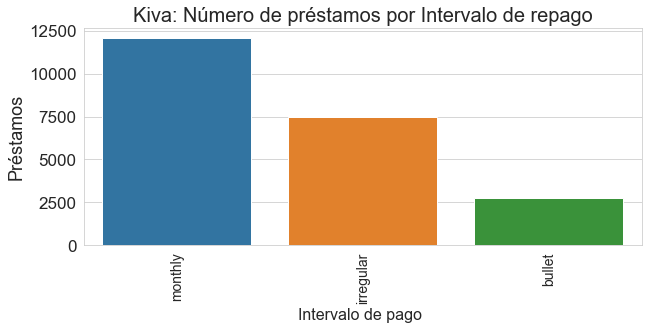

In [95]:
plt.figure(figsize=(10,4))
sns.countplot(peru['repayment_interval'], order = peru['repayment_interval'].value_counts().iloc[0:49].index)
plt.title("Kiva: Número de préstamos por Intervalo de repago", fontsize=20)
plt.xlabel('Intervalo de pago ', fontsize=16)
plt.ylabel('Préstamos', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [ ]:
# La mayor parte de préstamos son pagados mensualmente (54%), sin embargo una buena parte son irregulares (34%) y una menor 
# proporción (12%)son pagos en donde cancela todo el préstamo de una sola vez.

##### 5.6.4.2 Distribución de montos prestados según modalidad de pago

Text(0.5, 1.0, 'Distribución de probabilidad de montos prestados(log) según modalidad de pago')

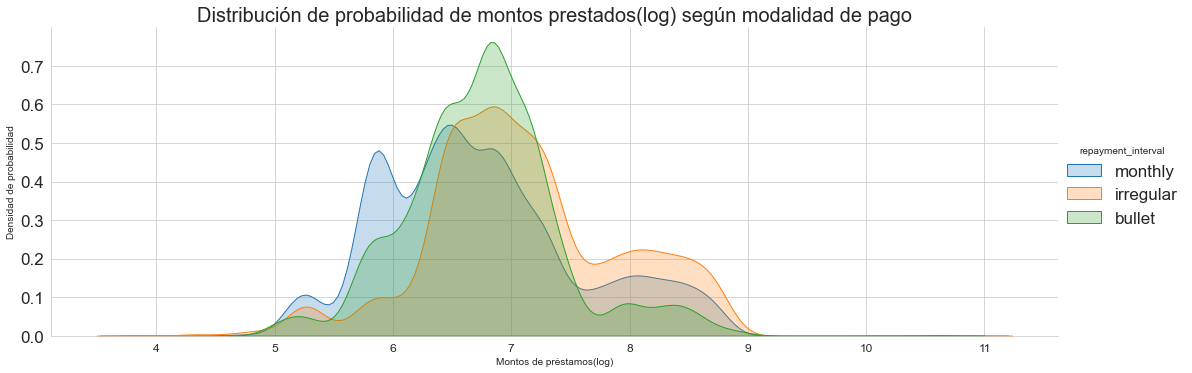

In [96]:
facetgrid = sns.FacetGrid(peru, hue='repayment_interval', size=5, aspect=3)
facetgrid = (facetgrid.map(sns.kdeplot, 'loan_amount_log', shade=True).set_axis_labels('Montos de préstamos(log)', 'Densidad de probabilidad').add_legend(fontsize=17))
plt.title('Distribución de probabilidad de montos prestados(log) según modalidad de pago', fontsize=20)

In [ ]:
# El gráfico de 5.6.4.1 mostraba el número de préstamos por periodicidad de pago. Mientras que el gráfico actual permite realizar el análisis según montos de préstamos.
# A diferencia de un histograma la Estimación de Densidad de Kernel(KDE) suaviza las observaciones con un Kernel gausiano, produciendo una estimación de densidad continua.
# A partir del KDE de los montos de préstamos, diferenciado por intervalos de pago, se puede observar que los préstamos de montos mas pequeños se pagan mayormente de manera mensual, los medianos mayormente de una sola vez y los mas grandes mayormente de manera irregular.
# Hay sin embargo, una buena cantidad de préstamos medianos que se pagan también de manera mensual o irregular.
# Y hay igualmente una importante cantidad de préstamos medianos que se pagan de manera mensual. 

##### 5.6.4.3 Plazo de pagos

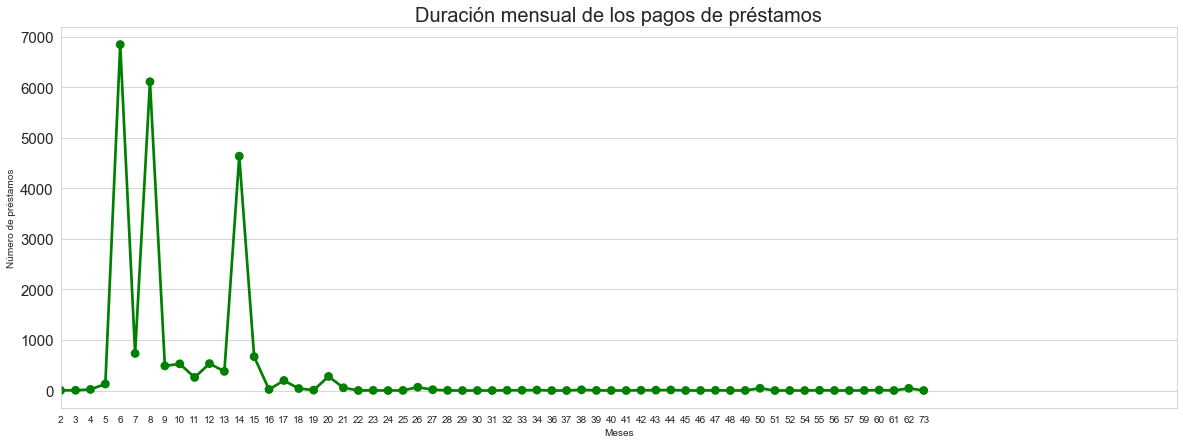

In [134]:
peru_terms = pd.DataFrame(peru['term_in_months'].value_counts(sort='country'))
peru_terms.reset_index(inplace=True)
peru_terms.columns = ['term_in_months', 'total_amount']

plt.figure(figsize=(20, 7))

pointplot = sns.pointplot(x=peru_terms['term_in_months'], y=peru_terms['total_amount'], color='g')
pointplot.set(xlabel='Meses', ylabel='Número de préstamos')
plt.title('Duración mensual de los pagos de préstamos', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.xlim(0, 75)
plt.show()

In [ ]:
# Los prestamos de Kiva al Perú oscilan en plazos de entre 2 y 73 meses. Sin embargo la mayoría de préstamos se establece en un rango que va de los 6 a los 15 meses.
# La gran mayoría de préstamos se pactan a 6 meses, le siguen los de 8 y 14 meses.

### 5.7 Préstamos por Género

#### 5.7.1 Número de préstamos según género

In [171]:
peru_genero = pd.DataFrame(peru['clean_borrower_genders'].value_counts().reset_index())
peru_genero.head()

,index,clean_borrower_genders
0,female,14041
1,male,8138


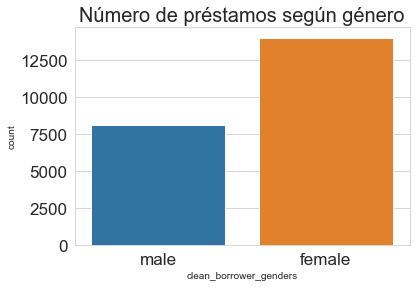

In [143]:
sns.countplot(peru['clean_borrower_genders'])
plt.title('Número de préstamos según género', fontsize=20);

In [ ]:
# En cuanto a número de préstamos las mujeres tienen casi dos tercios del total (63%). Lo que muestra que el emprendedurismo en el Perú tiene rostro de mujer.

#### 5.7.2 Monto total de préstamos según género

In [156]:
pmgenero = peru.groupby('clean_borrower_genders')['loan_amount'].sum()\
         .sort_values(ascending = False).reset_index()
pmgenero

,clean_borrower_genders,loan_amount
0,female,21552675
1,male,9156150


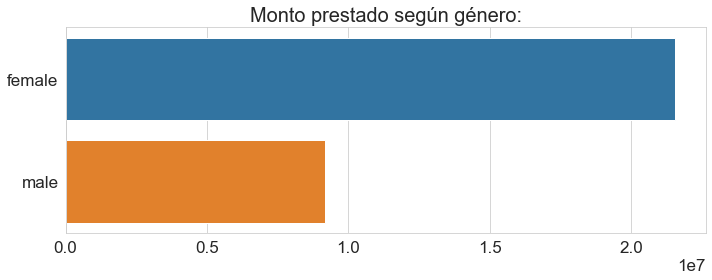

In [181]:
fig = plt.figure(figsize=(10, 4))
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17

ax1 = sns.barplot(pmgenero['loan_amount'], pmgenero['clean_borrower_genders'])
ax1.set(xlabel='', ylabel='')
ax1.set_title('Monto prestado según género:', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
# En cuanto al monto total de préstamos, las mujeres recibieron el 70% (21'552,675 dólares).

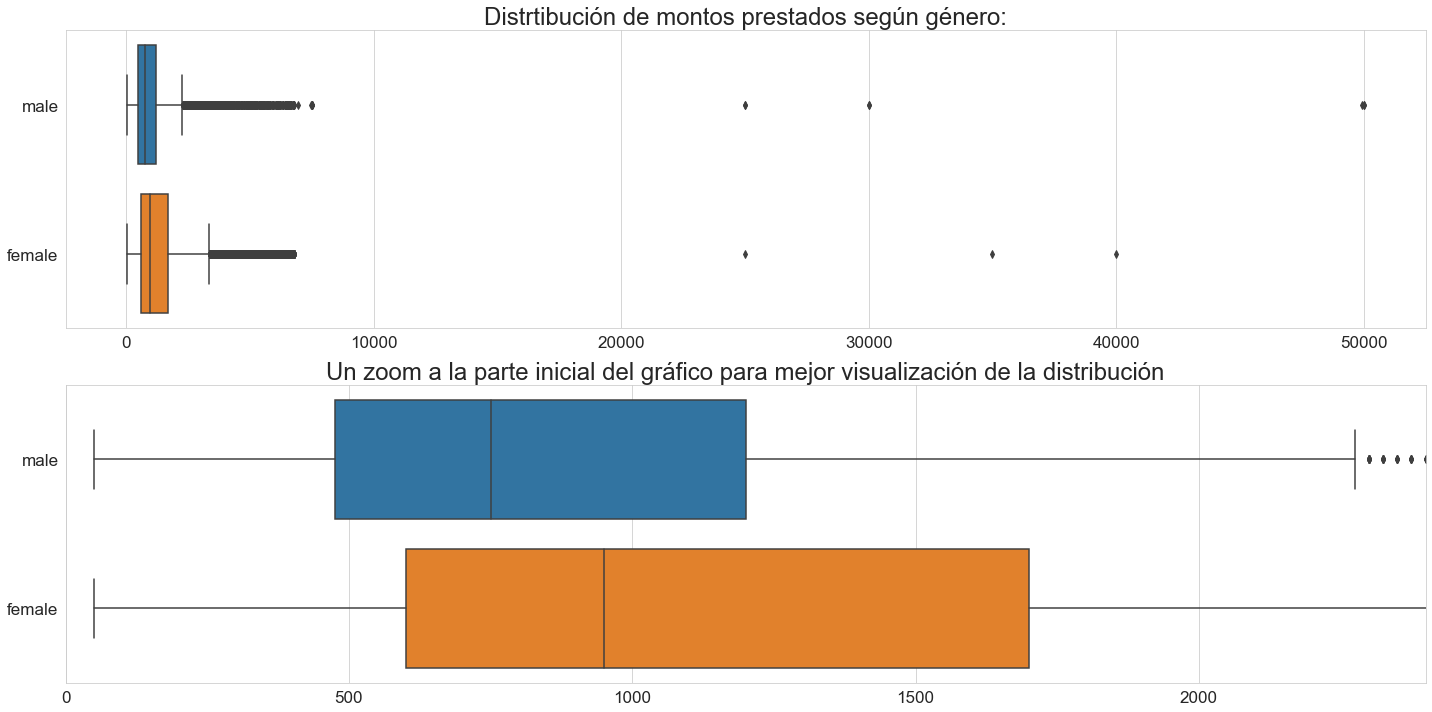

In [182]:
fig = plt.figure(figsize=(20, 10))
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17

plt.subplot(211)
ax1 = sns.boxplot(peru['loan_amount'], peru['clean_borrower_genders'])
ax1.set(xlabel='', ylabel='')
ax1.set_title('Distrtibución de montos prestados según género:', fontsize=24)

plt.subplot(212)
ax2 = sns.boxplot(peru['loan_amount'], peru['clean_borrower_genders'])
ax2.set(xlabel='', ylabel='')
ax2.set_title('Un zoom a la parte inicial del gráfico para mejor visualización de la distribución', fontsize=24)
ax2.set_xlim(0, 2400)

plt.tight_layout()
plt.show()

In [ ]:
# Algo interesante que debe destacarse es que a pesar que los hombres participaron menos y recibueron solo el 30% del total, los préstamos más altos fueron solicitados por ellos.
# La gráfica superior muestra como es que el mayor préstamo otorgado a una mujer es de 40,000 dólatres mientras que el de un hombre fie de 50,000 dólares.
# En la gráfica inferior le damos una mirada mayor al intervalo de préstamos menores a 2,400 dólares. Aquí observamos que la mediana de préstamos de, las mujeres es mayor, pero los hombres empuezan a tener montos mayores más rápidamente, lo que se refleja en los datos atípicos en el extremo derecho. 

#### 5.7.3 Genero y Sector

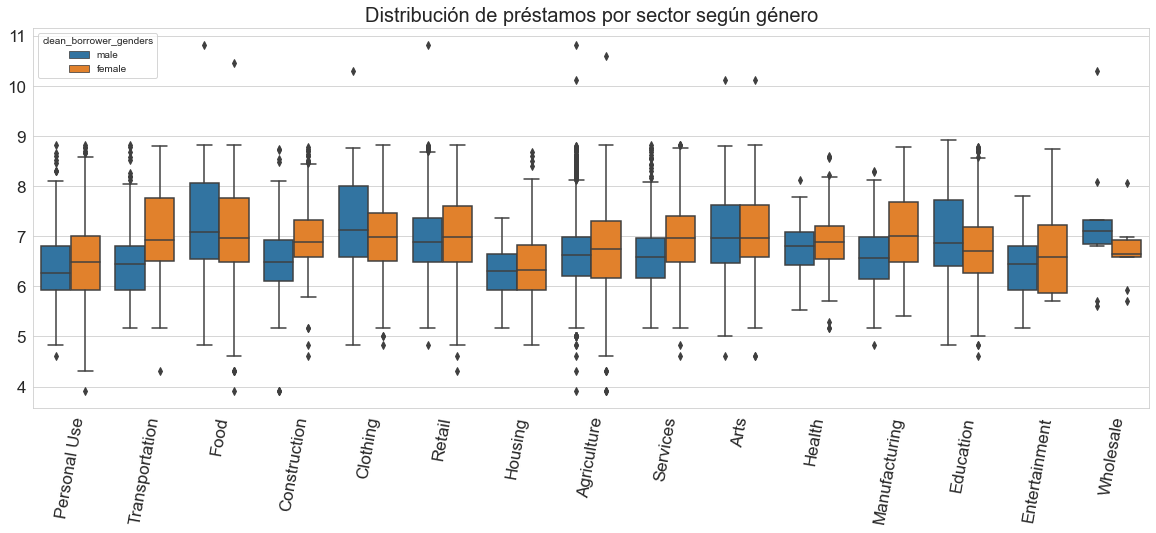

In [186]:
plt.figure(figsize=(20, 7))

boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=peru, hue='clean_borrower_genders')
boxplot.set(xlabel='', ylabel='')
plt.title('Distribución de préstamos por sector según género', fontsize=20)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [ ]:
# Los préstamos en cuanto a sectores son dominados por los hombres en alimentos, vestidos, artes, educación y ventas mayoristas.
# Las mujeres dominan en los sectores: Uso personal, transportes, ventas minoristas, agricultura y entretenimiento.
# El emprendedurismo en el Perú rompe algunos esquemas de actividades tradicionalmente "masculinas" y "femeninas", como alimento y vestido ahora en hombres y transporte, agricultura y manufactura ahora en mujeres, aunque se mantienen algunas tradicionales como la inversión en educación en favor de los hombres. 

#### 5.7.4 Género y Actividades

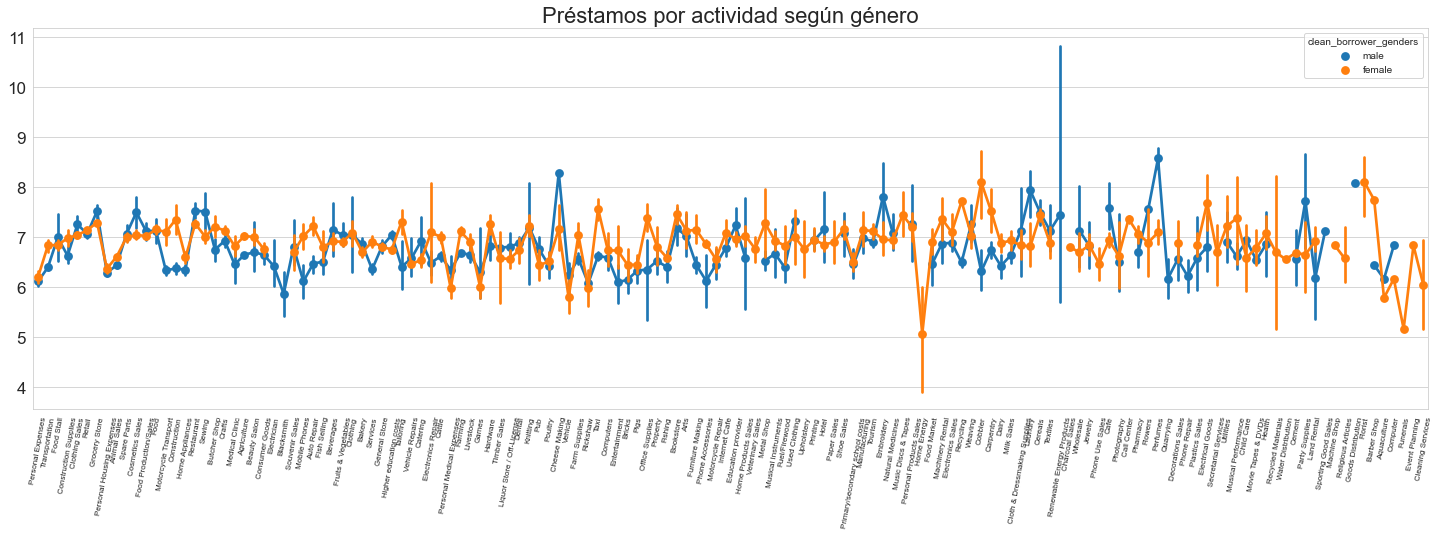

In [191]:
plt.figure(figsize=(25, 7))

pointplot = sns.pointplot(x='activity', y='loan_amount_log', data=peru, hue='clean_borrower_genders')
pointplot.set(xlabel='', ylabel='')
plt.title('Préstamos por actividad según género', fontsize=22)
plt.xticks(rotation=80, fontsize=8)
plt.yticks(fontsize=17)
plt.show()

In [ ]:
# El gráfico muestra que no se puede establecer un patrón de comportamiento general de género con respecto a los préstamos por actividad.
# Hay grupos de actividades en donde sí hay un comportamiento similar en ambos géneros y otros en lo que no lo hay, así como que hay actividades en donde sólo hay mujeres o solo hombres.

### 5.8 Socios Locales de Kiva 

#### 5.8.1 Sector al que pertenecen los socios locales 

In [195]:
peru_sector_partner = pd.DataFrame(peru_partners['sector'].value_counts().reset_index())
peru_sector_partner.head()

,index,sector
0,General Financial Inclusion,585
1,Agriculture,10
2,Artisan,6
3,Education,4
4,SME Financial Inclusion,2


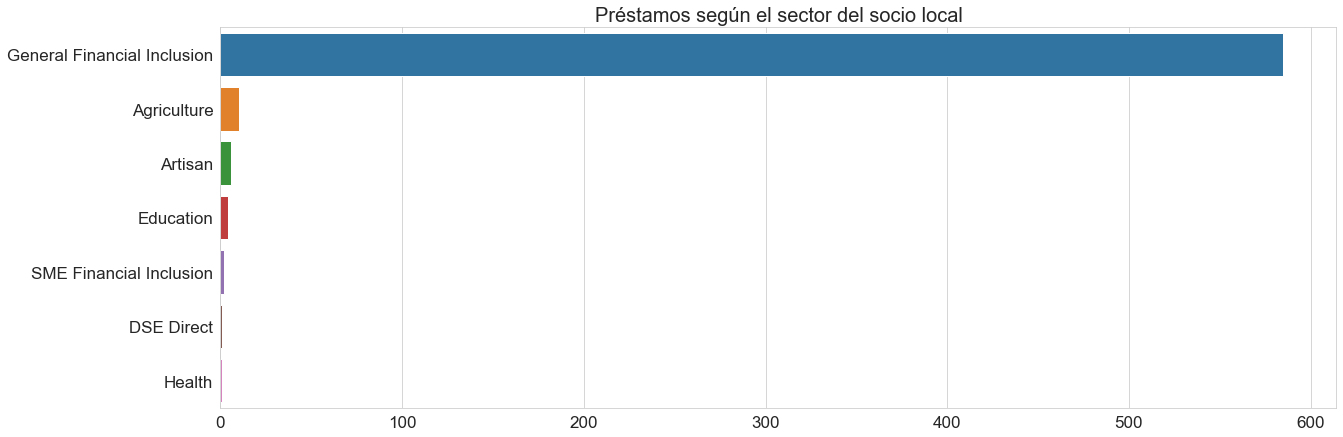

In [101]:
peru_sector_partner = pd.DataFrame(peru_partners['sector'].value_counts().reset_index())
peru_sector_partner.head()

plt.figure(figsize=[20, 7])

barplot = sns.barplot(x='sector', y='index', data=peru_sector_partner)
barplot.set(xlabel='', ylabel='')
plt.title('Préstamos según el sector del socio local', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [ ]:
# Los socios locales de Kiva en el Perú están clasificados en más del 96% dentro del ámbito de la inclusión financiera, es decir grupos creados para la intermediación financiera.
# Grupos de emprendedores organizados por actividad económica son completamente minoritarios. Hay una gran veta por trabajar aquí y que podría incluso ser un factor de reducción de costos.

#### 5.8.2  ¿Quiénes son los socios locales de Kiva? 

In [196]:
peru_partners_count = pd.DataFrame(peru_partners['field partner name'].value_counts().reset_index())
peru_partners_count

,index,field partner name
0,Cooperativa de Ahorro y CrÍ©dito Norandino,320
1,AsociaciÍ_n Arariwa,174
2,Edpyme Alternativa,38
3,Fondesurco,38
4,EDAPROSPO,15
5,Fairtrasa Peru S.A.,8
6,Novica,6
7,Instituto Peruano de Fomento Educativo,4
8,Cooperativa Agraria de Productores de Tara del...,2
9,Agora Partnerships,1


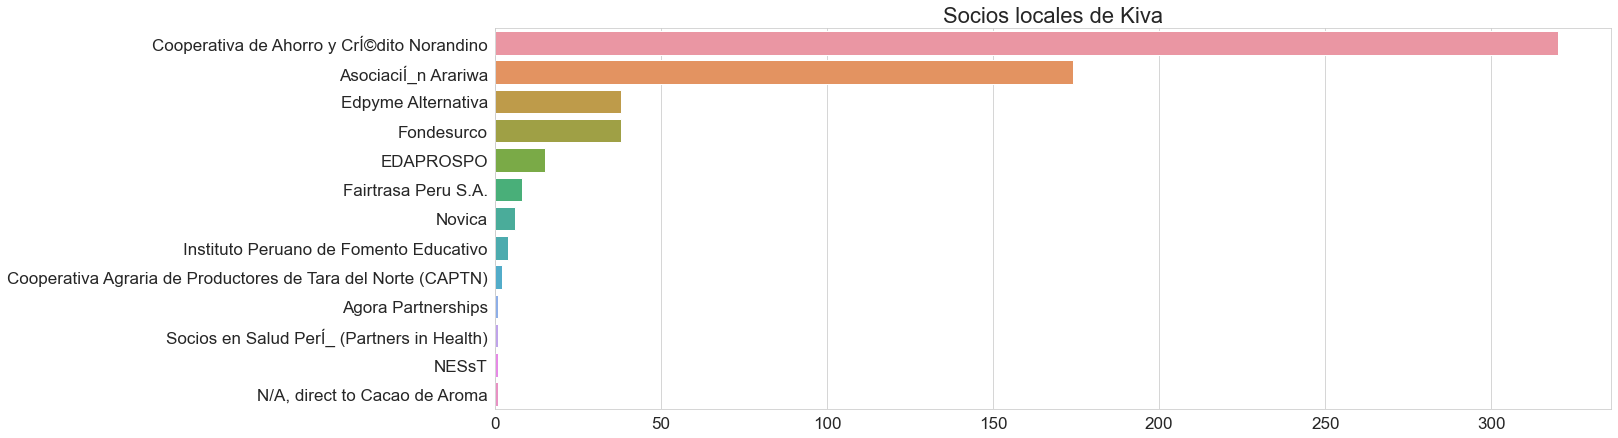

In [102]:
peru_partners_count = pd.DataFrame(peru_partners['field partner name'].value_counts().reset_index())
plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=peru_partners_count['field partner name'], y=peru_partners_count['index'])
barplot.set(xlabel='', ylabel='')
plt.title('Socios locales de Kiva', fontsize=22)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [ ]:
# El gráfico muestra que efectivamente el mayor número de préstamos lo maneja un pequeño grupo de instituciones financieras de segundo piso, el Estado está casi ausente y las asociaciones de emprendedores son marginales.

## 6. Resultados

### 6.1 Kiva a Nivel mundial 

In [ ]:
# 1.Entre enero de 2014 y julio 2017 se realizaron a través de Kiva 671,205 préstamos en 87 países, por un monto de 565 millones 421 mil 150 dólares, con un promedio de 842.4 dólares por préstamo. 
# 2.Del total de préstamos, Latinoamérica tiene el segundo lugar con el 22%.
# 3.Filipinas ocupa el primer lugar de los países con mayor préstamo con 55’342,225 dólares, el Perú ocupa el cuarto lugar con 30’867,400 dólares.
# 4.A nivel global Agricultura es el sector que más fondos ha recibido, aunque no el que recibe mayores montos promedio por préstamo. 
# 5.A nivel mundial el 77% de los préstamos son dirigidos a mujeres.

### 6.2 Kiva en el Perú

In [ ]:
# 1.En periodo descrito el Perú recibió 22 mil 233 préstamos, con un promedio de 1388.4 dólares, muy por encima del promedio mundial. Empezaron con más de 7000 préstamos el 2014, bajaron a menos de 6000 el 2015 y hubo una recuperación el 2016. 
# 2.El préstamo menor fue de 50 dólares y el mayor de 50 mil dólares, lo cual muestra la flexibilidad del sistema y el potencial que existe. Sin embargo, la gran mayoría de préstamos bordea los mil dólares.
# 3.A nivel de regiones Cusco domina los préstamos con más del 28%. Descentralizar el sistema es un tema a explorar y necesario, además.
# 4.No existe correlación entre los montos de los préstamos y el % de población rural, es decir la cantidad de préstamos de Kiva no crecen en función de una mayor ruralidad. El coeficiente de correlación es negativo por lo que más bien se podría estar dando un efecto contrario, aunque e; ser de -0.22 tampoco soporta la idea.
# 5.A nivel de sectores Alimentos, Agricultura y Retail son los mayores receptores de préstamos largamente y en ese orden. Sin embargo, el sector de ventas al por mayor es quien tiene el promedio más alto por préstamos. Mientras que agricultura y alimentos son los que alcanzan los montos de préstamos más altos y más veces.
# 6.Abarrotes, agricultura y ventas minoristas (junto a ventas de animales) son las actividades que recibieron los mayores montos de préstamos. Arroz, azúcar, leche y galletas dominan el uso de los préstamos en la actividad de abarrotes, mientras que semillas y fertilizantes son los principales usos de los préstamos en la actividad agricultura. 
# 7.Existe una correlación de 0.68 entre los montos financiados y el número de prestamistas, es decir efectivamente, y en general, para cubrir préstamos altos se juntan más personas, lo que indica que los prestamistas son también personas que aportan bajos capitales, según el sistema lo pueden hacer desde 25 dólares, lo cual es entendible considerando que no hay ganancias de por medio sino fines altruistas. El préstamo sin intereses ha reemplazado a las donaciones en este caso.
# 8.En el Perú, a excepción de Lima, casi todo el mosto prestado es financiado. La diferencia entre ambas categorías es que lo prestado es lo que Kiva entrega a los socios locales, mientras que lo financiado es lo que estos entregan a los prestatarios.  Lo que podría estar relacionado con los costos (o ganancias) de los socios locales en la capital.
# 9.El intervalo o frecuencia de los pagos de los préstamos son en su mayoría mensuales (54%), los pagos irregulares son el 34% y los de tipo pago en una sola vez o bullet el 12%. Sin embargo, si buscamos un patrón de comportamiento en los prestatarios peruanos encontramos que los préstamos de montos más pequeños se pagan mayormente de manera mensual, los medianos mayormente en una sola cuota y los más grandes mayormente de manera irregular.
# 10.Los préstamos de Kiva al Perú oscilan en plazos de entre 2 y 73 meses. Sin embargo, la mayoría de préstamos se establece en un rango que va de los 6 a los 15 meses. Y la gran mayoría se pacta a 6 meses, le siguen los de 8 y 14 meses.
# 11.A nivel de género, en el Perú las mujeres recepcionan el 63% del total de préstamos, distante al 77% del nivel global. No obstante, el porcentaje sube a70% si se considera el monto total recibido, aun cuando los mayores montos fueron recibidos por los hombres, 50 mil dólares, en el caso de las mujeres llegó a 40 mil dólares.
# 12.Los préstamos en cuanto a sectores dominados por los hombres son alimentos, vestidos, artes, educación y ventas mayoristas. Las mujeres dominan en los sectores: Uso personal, transportes, ventas minoristas, agricultura y entretenimiento. El emprendedurismo en el Perú rompe algunos esquemas de actividades tradicionalmente "masculinas" y "femeninas", viendo como alimento y vestido son mayormente préstamos dominados por hombres, mientras que transporte, agricultura y manufactura es dominado por mujeres. Aunque se mantienen algunas tradiciones como la inversión en educación en favor de los hombres, que evidentemente debe revertirse o igualarse.
# 13.No se puede establecer un patrón de comportamiento general de género con respecto a los préstamos por actividad. Hay grupos de actividades en donde sí hay un comportamiento similar en ambos géneros y otros en lo que no lo hay, así como que hay actividades en donde sólo hay mujeres o solo hombres.
# 14.Los socios locales de Kiva en el Perú están clasificados en más del 96% dentro del ámbito de la inclusión financiera, es decir grupos creados para la intermediación financiera. Grupos de emprendedores organizados por actividad económica son completamente minoritarios. Hay una gran veta por trabajar aquí y que podría incluso ser un factor de reducción de costos. El mayor número de préstamos lo maneja un pequeño grupo de instituciones financieras de segundo piso, el Estado está casi ausente y las asociaciones de emprendedores son marginales. Mucho por trabajar.

## 7. Bonus: Kiva y Pobreza

In [ ]:
# Este capítulo es solo el punto de partida de un siguiente artíiculo, donde se explorará con ayor detalle la pobreza en el 
# mundo y en especialmente en el Perú, y se añade para aprovechar la información del data set utiizado.

### 7.1 Establecer el DataSet para Perú

In [103]:
perumpidpto = kiva_mpi_region_locations[kiva_mpi_region_locations['country']== 'Peru']
perumpidpto.head(3)

,locationname,iso,country,region,world_region,mpi,geo,lat,lon
739,"Amazonas, Peru",PER,Peru,Amazonas,Latin America and Caribbean,0.096,"(-8.5155608, 126.0159255)",-8.515561,126.015925
740,"ðncash, Peru",PER,Peru,ðncash,Latin America and Caribbean,0.044,"(1000.0, 1000.0)",NaN,NaN
741,"Apurðmac, Peru",PER,Peru,Apurðmac,Latin America and Caribbean,0.091,"(1000.0, 1000.0)",NaN,NaN


In [ ]:
# Se modifican los nombres de la columna region

In [104]:
peruDpto = ['Amazonas',
                 'Ancash',
                 'Apurimac',
                 'Arequipa',
                 'Ayacucho',
                 'Cajamarca',
                  'Callao',
                 'Cusco',
                 'Huancavelica',
                 'Huanuco',
                 'Ica',
                 'Junin',
                 'La Libertad',
                 'Lambayeque',
                 'Lima',
                 'Loreto',
                 'Madre de Dios',
                 'Moquegua',
                 'Pasco',
                 'Piura',
                 'Puno',
                 'San Martin',
                 'Tacna',
                 'Tumbes',
                 'Ucayali']
perumpidpto['region'] = peruDpto 

In [105]:
# Se verifican los cambios
perumpidpto.head(3)

,locationname,iso,country,region,world_region,mpi,geo,lat,lon
739,"Amazonas, Peru",PER,Peru,Amazonas,Latin America and Caribbean,0.096,"(-8.5155608, 126.0159255)",-8.515561,126.015925
740,"ðncash, Peru",PER,Peru,Ancash,Latin America and Caribbean,0.044,"(1000.0, 1000.0)",NaN,NaN
741,"Apurðmac, Peru",PER,Peru,Apurimac,Latin America and Caribbean,0.091,"(1000.0, 1000.0)",NaN,NaN


### 7.2 Pobreza Multidimensional por Departamento (Región) - 2017

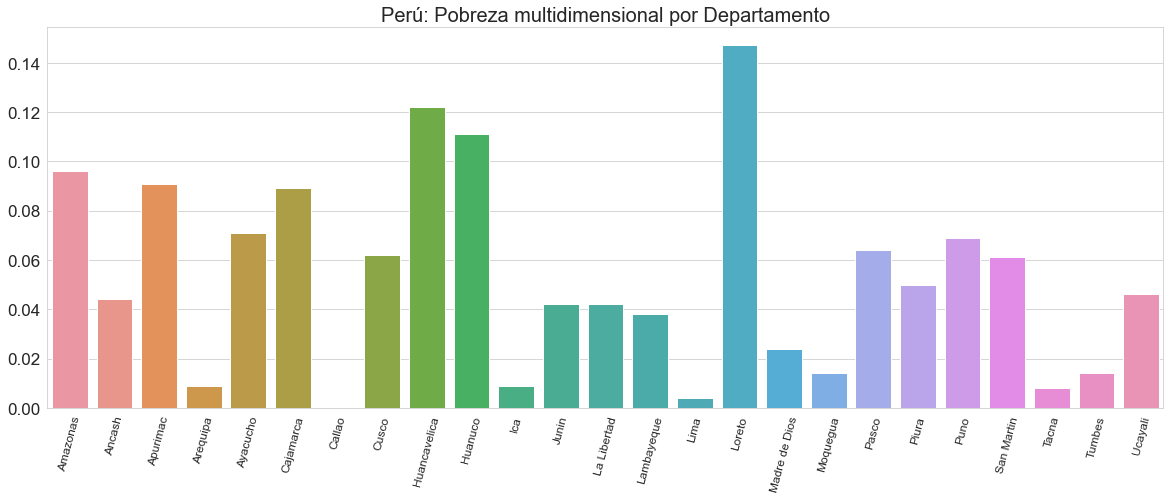

In [106]:
plt.figure(figsize=[20, 7])

barplot = sns.barplot(x='region', y='mpi', data=perumpidpto)
barplot.set(xlabel='', ylabel='')
plt.title('Perú: Pobreza multidimensional por Departamento', fontsize=20)
plt.xticks(fontsize=12,rotation=75 )
plt.yticks(fontsize=17)
plt.show()

In [107]:
perumpidpto.set_index('region', inplace=True)# convierte 'region' en la variable indice

In [30]:
# Se incluye la variable región nat (costa, sierra, selva)

In [108]:
costa = ['Ica',
        'La Libertad',
        'Lambayeque',
        'Piura',
        'Tacna',
        'Tumbes']

sierra = ['Ancash',
         'Apurimac',
         'Arequipa',
         'Ayacucho',
         'Cajamarca',
         'Cusco',
         'Huancavelica',
         'Junin',
         'Moquegua',
         'Pasco',
         'Puno']

selva = ['Amazonas',
        'Huanuco',
        'Loreto',
        'Madre de Dios',
        'San Martin',
        'Ucayali']

Lima = ['Lima']

for state in costa:
    perumpidpto.loc[state, 'region nat'] = 'Costa'
        
for state in sierra:
    perumpidpto.loc[state, 'region nat'] = 'Sierra'
    
for state in selva:
    perumpidpto.loc[state, 'region nat'] = 'Selva'
    
for state in Lima:
    perumpidpto.loc[state, 'region nat'] = 'Lima'
        
perumpidpto.head(3)

,locationname,iso,country,world_region,mpi,geo,lat,lon,region nat
region,,,,,,,,,
Amazonas,"Amazonas, Peru",PER,Peru,Latin America and Caribbean,0.096,"(-8.5155608, 126.0159255)",-8.515561,126.015925,Selva
Ancash,"ðncash, Peru",PER,Peru,Latin America and Caribbean,0.044,"(1000.0, 1000.0)",NaN,NaN,Sierra
Apurimac,"Apurðmac, Peru",PER,Peru,Latin America and Caribbean,0.091,"(1000.0, 1000.0)",NaN,NaN,Sierra


### 7.3 Pobreza Multidimensional por Región Natural - 2017

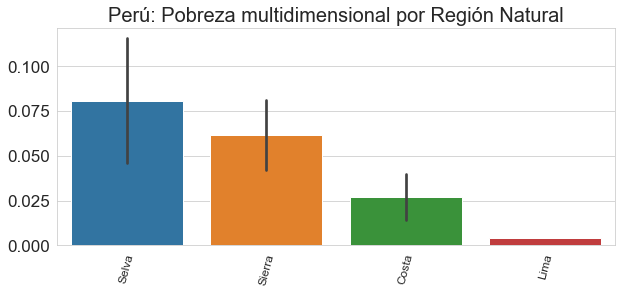

In [110]:
plt.figure(figsize=[10, 4])

barplot = sns.barplot(x='region nat', y='mpi', data=perumpidpto)
barplot.set(xlabel='', ylabel='')
plt.title('Perú: Pobreza multidimensional por Región Natural', fontsize=20)
plt.xticks(fontsize=12,rotation=75 )
plt.yticks(fontsize=17)
plt.show()

# FIN